# <strong><font color="7b71ff">IA aplicada a Data Science: utilizando IA na construção de visualização de dados</font></strong>


---

<img src="https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/logos/logo_branca_fundo_azul.png" alt="inserir alt">

# **Aula 1 - Conhecendo os dados**


A **Zoop** é uma grande varejista que atende a todas as regiões do Brasil por meio do seu **e-commerce**. Ela é conhecida pela ampla variedade em seus produtos buscando atender a todo tipo de público. Ela possui uma série de centros de distribuição (CDs) para entrega de seus produtos, com grande parte situada no estado de São Paulo.

Para gerenciar o seu alcance, bem como o faturamento de seu setor em lojas online, ela consolida os dados em diferentes períodos de tempo e avalia esses dados para gerar insights e tomar algumas decisões estratégicas em seu negócio. Neste projeto, vamos ter acesso aos dados de parte da sua clientela do e-commerce dentro do ano de 2023.  

Você, como **analista de dados** da empresa, precisará gerar visuais que auxiliem na construção de relatórios de acordo com algumas premissas passadas pelas partes interessadas realizando uma rápida análise do público que possuimos na loja virtual e do faturamento da empresa.

**Problema de negócio:**

O time de dados da **Zoop** precisa extrair os dados e gerar informações por meio de visuais que possam ser apresentados a diretoria da empresa apontando os dados de faturamento, perfil do cliente e outros indicadores que possam auxiliar na tomada de decisão em sua loja online.

**Base de dados**

Vamos importar duas bases de dados:

> Dados de clientes do e-commerce da Zoop, separados pelo código identificador da compra.

> Dados de vendas do e-commerce da Zoop em 2023, separados pelo código identificador da compra.

Esses dados serão lidos a partir do repositório compartilhado pelo GitHub.

**Desafio**

Você, como analista de dados do time de dados da Zoop, tem o desafio de extrair os dados de ambas as bases e construir visuais que possam agregar valor a apresentação dos resultados da Zoop em 2023. Para isso, serão repassados ao todo **7 questionamentos** que foram separados para que você possa contribuir na construção do storytelling das vendas da empresa.

Para agilizar o processo da análise exploratória dos dados (AED) e a criação dos visuais, utilizaremos a IA do **ChatGPT** como nossa assistente, tudo isso levando em conta o prazo curto para as análises e a qualidade da entrega.


## **1.2 - Obtendo os dados**

---



Vamos inicialmente passar o link do repositório com as duas bases que utilizaremos no projeto:

In [62]:
url_clientes = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_clientes.csv"
url_vendas = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_vendas.csv"

Após esta etapa, vamos criar 2 dataframes com os dados dos clientes e das vendas da Zoop separadamente e dar uma pequena checada nas tabelas extraídas.

In [63]:
import pandas as pd

In [64]:
clientes = pd.read_csv(url_clientes)

In [65]:
clientes.head()

,ID_compra,ID_cliente,cidade,uf,regiao,idade,sexo_biologico,cashback,avaliacao_compra
0,904,8972,Natal,Rio Grande do Norte,Nordeste,49,Masculino,Não,9
1,4613,5120,São Paulo,São Paulo,Sudeste,49,Feminino,Não,9
2,5579,1847,São Paulo,São Paulo,Sudeste,24,Feminino,Não,8
3,2405,2846,São Paulo,São Paulo,Sudeste,38,Feminino,Sim,7
4,2485,2715,Salvador,Bahia,Nordeste,30,Feminino,Não,10


In [66]:
vendas = pd.read_csv(url_vendas)

In [67]:
vendas.tail()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento
6164,6141,2023-12-31,17:49,Eletrodomésticos,1509.9,5,377.48,Cartão de Crédito
6165,6148,2023-12-31,23:02,Papelaria e escritório,14.0,2,3.36,PIX
6166,6123,2023-12-31,21:25,Alimentos e bebidas,77.9,1,7.79,Cartão de Crédito
6167,6147,2023-12-31,21:38,Livros,142.9,4,17.15,Cartão de Crédito
6168,6122,2023-12-31,22:11,Beleza e cuidados pessoais,89.9,5,13.48,Cartão de Crédito


## **1.3 - Entendendo os dados**

---



Agora, vamos explorar os dados compreendendo o que significam e como podemos relacioná-los na construção dos visuais.

### **Base de clientes**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Vamos atuar como analista de dados de um e-commerce. Recebemos duas bases de dados com os dados dos clientes e das vendas em 2023, respectivamente.

Neste primeiro momento, vamos explorar a base clientes no formato de um DataFrame, chamado "clientes". Ela contém dados dos clientes que realizaram comprar na loja virtual, sendo eles: ID da compra, ID do cliente, a cidade, estado e região da compra, idade, sexo biológico, se participam do programa de cashback e avaliação da compra.

Queremos fazer uma breve exploração dos dados para compreender um pouco sobre eles. Lembrando que os dados desta base já estão limpos e tratados. Construa um código para executar esta etapa usando o Python.

Não é necessário utilizar "print()" para mostrar o resultado das consultas.

In [68]:
# Verificando as 5 primeiras linhas da base
clientes.head()


,ID_compra,ID_cliente,cidade,uf,regiao,idade,sexo_biologico,cashback,avaliacao_compra
0,904,8972,Natal,Rio Grande do Norte,Nordeste,49,Masculino,Não,9
1,4613,5120,São Paulo,São Paulo,Sudeste,49,Feminino,Não,9
2,5579,1847,São Paulo,São Paulo,Sudeste,24,Feminino,Não,8
3,2405,2846,São Paulo,São Paulo,Sudeste,38,Feminino,Sim,7
4,2485,2715,Salvador,Bahia,Nordeste,30,Feminino,Não,10


In [69]:
# Verificando as informações gerais do DataFrame
clientes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID_compra         6169 non-null   int64 
 1   ID_cliente        6169 non-null   int64 
 2   cidade            6169 non-null   object
 3   uf                6169 non-null   object
 4   regiao            6169 non-null   object
 5   idade             6169 non-null   int64 
 6   sexo_biologico    6169 non-null   object
 7   cashback          6169 non-null   object
 8   avaliacao_compra  6169 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 433.9+ KB


In [70]:
# Estatísticas descritivas para colunas numéricas (idade, avaliação)
clientes.describe()

,ID_compra,ID_cliente,idade,avaliacao_compra
count,6169.000000,6169.000000,6169.000000,6169.000000
mean,3085.000000,5461.475280,38.260010,8.443670
std,1780.981237,2610.959977,9.838951,1.730584
min,1.000000,1005.000000,18.000000,0.000000
25%,1543.000000,3148.000000,31.000000,8.000000
50%,3085.000000,5436.000000,38.000000,9.000000
75%,4627.000000,7748.000000,45.000000,9.000000
max,6169.000000,9999.000000,70.000000,10.000000


In [71]:
clientes['sexo_biologico'].value_counts()

,count
sexo_biologico,
Feminino,3371
Masculino,2798


In [72]:
clientes['idade'].mean()

np.float64(38.2600097260496)

In [73]:
clientes['regiao'].value_counts()

,count
regiao,
Sudeste,2666
Nordeste,1882
Sul,819
Centro-Oeste,495
Norte,307


In [74]:
clientes['avaliacao_compra'].mean()

np.float64(8.44366996271681)

In [75]:
clientes['cashback'].value_counts()

,count
cashback,
Não,3557
Sim,2612


### **Base de vendas**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Agora vamos explorar a base de vendas no formato de um DataFrame, chamado "vendas". Ela contém dados das vendas do e-commerce, sendo eles: ID da compra, data da compra, horário da compra, categoria do produto, preco unitário do produto, quantidade vendida, frete e o método do pagamento.

Queremos fazer uma breve exploração dos dados para compreender um pouco sobre eles. Lembrando que os dados desta base também já estão limpos e tratados. Construa um código para executar esta etapa usando o Python.

In [76]:
# Verificando as 5 primeiras linhas da base de vendas
vendas.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX


In [77]:

# Verificando as informações gerais do DataFrame
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_compra         6169 non-null   int64  
 1   data              6169 non-null   object 
 2   horario           6169 non-null   object 
 3   categoria         6169 non-null   object 
 4   preco_unitario    6169 non-null   float64
 5   quantidade        6169 non-null   int64  
 6   frete             6169 non-null   float64
 7   metodo_pagamento  6169 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 385.7+ KB


In [78]:
# Verificando distribuição das categorias de produto
vendas['data'] = pd.to_datetime(vendas['data'], format='%Y-%m-%d')

In [79]:
# Estatísticas descritivas para colunas numéricas
vendas.describe()

,ID_compra,data,preco_unitario,quantidade,frete
count,6169.000000,6169,6169.000000,6169.000000,6169.000000
mean,3085.000000,2023-08-20 00:12:22.292105984,873.234738,3.004863,119.233832
min,1.000000,2023-01-03 00:00:00,2.900000,1.000000,0.000000
25%,1543.000000,2023-05-30 00:00:00,44.900000,2.000000,0.320000
50%,3085.000000,2023-08-31 00:00:00,93.900000,3.000000,7.550000
75%,4627.000000,2023-11-23 00:00:00,221.900000,4.000000,29.240000
max,6169.000000,2023-12-31 00:00:00,8000.000000,5.000000,4521.540000
std,1780.981237,NaN,1852.064342,1.420725,366.149225


In [80]:
# Verificando distribuição das categorias de produto
vendas['categoria'].value_counts()

,count
categoria,
Alimentos e bebidas,1495
Beleza e cuidados pessoais,1062
Casa e limpeza,1041
Eletrodomésticos,665
Eletrônicos,580
Papelaria e escritório,551
Ferramentas e construção,474
Livros,301


In [81]:
# Verificando distribuição das categorias de produto
vendas['preco_unitario'].mean()

np.float64(873.2347382071648)

In [82]:
# Verificando distribuição das categorias de produto
vendas['quantidade'].sum()

np.int64(18537)

In [83]:
# Verificando distribuição das categorias de produto
vendas['frete'].sum()

np.float64(735553.51)

In [84]:
vendas['metodo_pagamento'].value_counts()

,count
metodo_pagamento,
Cartão de Crédito,2851
PIX,2244
Cartão de Débito,547
Boleto,527


## **1.4 - Tipos de gráficos**

---



Já exploramos um pouco das duas bases do projeto e obtivemos alguns insights interessantes que podem ser importantes na construção de nossas visuais.

Agora, vamos tentar simplificar a nossa análise consolidando os dados em uma única tabela para a partir daí debruçar nas possibilidades de visuais combinando os dados. Será que o GPT pode nos ajudar aqui?

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Vamos agora unir as duas bases do nosso projeto em uma só utilizando como chave a coluna "ID_compra". Além disso, vamos organizar as colunas na seguinte sequência:

* ID_compra
* data
* horario
* categoria
* preco_unitario
* quantidade
* frete
* metodo_pagamento
* ID_cliente
* idade
* sexo_biologico
* cidade
* uf
* regiao
* cashback
* avaliacao_compra

Construa um código para executar esta etapa usando o Python e a biblioteca Pandas.

In [85]:
df = pd.merge(vendas, clientes, on='ID_compra')

colunas_organizadas = [
    'ID_compra', 'data', 'horario', 'categoria', 'preco_unitario', 'quantidade',
    'frete', 'metodo_pagamento', 'ID_cliente', 'idade', 'sexo_biologico',
    'cidade', 'uf', 'regiao', 'cashback', 'avaliacao_compra'

]

df = df[colunas_organizadas]

In [86]:
df.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,ID_cliente,idade,sexo_biologico,cidade,uf,regiao,cashback,avaliacao_compra
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto,6149,30,Masculino,Porto Alegre,Rio Grande do Sul,Sul,Sim,10
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX,9491,36,Masculino,São Paulo,São Paulo,Sudeste,Sim,8
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito,5288,39,Feminino,Porto Velho,Rondônia,Norte,Não,7
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX,9679,35,Masculino,Recife,Pernambuco,Nordeste,Sim,9
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX,1380,50,Masculino,São Paulo,São Paulo,Sudeste,Não,9


Agora vamos pedir ao ChatGPT ideias de visuais que podemos construir com esses dados.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Agora com o nosso "df" já construído por meio das duas bases do projeto, vamos iniciar um novo processo. Queremos iniciar a etapa da geração dos visuais que possam auxiliar na análise do faturamento ao longo do ano, perfil do cliente e outros dados que possam ser relevantes à análise e construção do nosso storytelling.

As colunas de "df" são:

* ID_compra: número único atribuído a compra realizada, no formato int
* data: data da compra, no formato datetime
* horario: horário da compra no formato object
* categoria: categoria do produto, no formato object
* preco_unitario: preço de uma unidade do produto, no formato float
* quantidade: quantidade vendida do produto, no formato int
* frete: frete a ser pago no total da compra, no formato float
* metodo_pagamento: método de pagamento da compra, no formato object
* ID_cliente: número único atribuído ao cliente, no formato int
* idade: idade do cliente, no formato int
* sexo_biologico: sexo biológico do cliente, no formato object
* cidade: cidade do cliente, no formato object
* uf: unidade federativa do cliente, no formato object
* regiao: região do cliente, no formato object
* cashback: se o cliente participa ou não do programa de cashback da loja, no formato object
* avaliacao_compra: avaliação do cliente pela compra, no formato int

O objetivo é abstrair e buscar relações para construir visuais interessantes para a análise dos dados dos clientes e vendas da Zoop.

Com base nas informações fornecidas, quais tipos de visualizações seriam úteis para atingir o objetivo de analisar os dados?

### ***Sugestões do ChatGPT***:


Com base nas informações fornecidas sobre as colunas do DataFrame "df", aqui estão algumas sugestões de visualizações que podem ser úteis para analisar os dados dos clientes e vendas da Zoop:

1. **Gráfico de Linha Temporal para Faturamento ao Longo do Ano:**
   - Utilize a coluna "data" para criar um gráfico de linha mostrando o faturamento total ao longo do ano. Isso pode ser mensal, semanal ou diário, dependendo da granularidade dos seus dados.

2. **Gráfico de Barras para Categorias de Produtos Vendidos:**
   - Utilize a coluna "categoria" para criar um gráfico de barras mostrando a distribuição das vendas por categoria de produtos. Isso pode ajudar a identificar as categorias mais populares.

3. **Gráfico de Barras ou Pizza para Métodos de Pagamento:**
   - Utilize a coluna "metodo_pagamento" para criar um gráfico de barras ou pizza mostrando a distribuição de métodos de pagamento utilizados pelos clientes.

4. **Gráfico de Dispersão para Relacionamento entre Idade e Avaliação de Compra:**
   - Utilize as colunas "idade" e "avaliacao_compra" para criar um gráfico de dispersão e verificar se há alguma correlação entre a idade dos clientes e a avaliação da compra.

5. **Gráfico de Barras para Participação no Programa de Cashback:**
   - Utilize a coluna "cashback" para criar um gráfico de barras mostrando a participação dos clientes no programa de cashback.

6. **Mapa de Calor para Correlações:**
   - Crie um mapa de calor usando as correlações entre diferentes variáveis. Isso pode ajudar a identificar padrões e relações entre as diferentes características dos clientes e as transações.

7. **Gráfico de Boxplot para Preço Unitário por Categoria de Produto:**
   - Utilize as colunas "preco_unitario" e "categoria" para criar um gráfico de boxplot e identificar a variabilidade de preços em diferentes categorias de produtos.

8. **Gráfico de Barras para Avaliações Médias por Região:**
   - Utilize as colunas "avaliacao_compra" e "regiao" para criar um gráfico de barras mostrando as avaliações médias das compras em diferentes regiões.

Essas são apenas algumas ideias iniciais, e a escolha das visualizações dependerá dos insights específicos que você busca e dos questionamentos que deseja responder com a análise dos dados. </font>


> O ChatGPT trouxe algumas ideias interessantes para criação dos gráficos.
>
> Porém, como já possuimos alguns questionamentos para nos orientar na criação dos visuais, não vamos seguir todas as sugestões aqui apontadas.
>
> Fica como uma sugestão para te auxiliar quando você estiver trabalhando com outras bases e estiver com dificuldade em pensar em quais visuais você poderá construir.
>
> **Observação:** Lembrando que é muito provável que os gráficos apontados para mim, não sejam necessariamente iguais aos que aparecerá para você, dado a aletoriedade das respostas de qualquer IA generativa.

# **Aula 2 - Visualizando os dados**




## **2.1 - Definindo os visuais**

---



Após a etapa de exploração dos dados, vamos ler as questões que foram levantadas na demanda que recebemos. Assim, começaremos a pensar nos visuais que iremos construir com o auxílio da IA.

### **Questionamentos**

#### Vendas

1.   Quais foram os métodos de pagamentos mais utilizados em 2023?
2.   Qual foi o faturamento por categoria em 2023?
3.   Como foram as vendas ao longo dos meses em 2023?
4.   Como esta dividida a venda por trimestre por método de pagamento? Existe um período em que algum tipo de pagamento se sobressai?

#### Perfil do cliente

5.   Qual a proporção da clientela que participa de nosso programa de cashback?
6.   Como estão distribuídas as avaliações de produto? Temos bons números gerais?
7.   Como está distribuído o nosso público por idade e sexo biológico? Existe um grupo que sobressai?

Inicialmente, vamos fazer a primeira versão dos gráficos, ainda não refinados com os elementos visuais, para mais a frente ir adicionando as diversas técnicas de storytelling.

### **1º Questionamento:** Quais foram os métodos de pagamentos mais utilizados em 2023?

Vamos pedir ao ChatGPT para nos auxiliar na construção desse visual. Primeiro, vamos tratar o dado gerando uma tabela resumida (que também é uma espécie de visual) e em seguida construir o 1º gráfico.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Temos um DataFrame chamado "df" e queremos construir um visual que apresente quais métodos de pagamentos foram os mais utilizados.

Em "df", temos a coluna "metodo_pagamento" com os 4 tipos de pagamento utilizado na compra.

Inicialmente, queremos construir uma tabela chamada "metodos_de_pagamento" que resuma os dados dessa coluna e, na sequência, desejamos criar uma visualização que apresente a quantidade desses métodos de pagamento presentes na tabela "metodo_pagamento".

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

In [87]:
import matplotlib.pyplot as plt

metodos_de_pagamento = df['metodo_pagamento'].value_counts().reset_index()
metodos_de_pagamento.columns = ['Metodo_pagamento', 'Quantidade']

metodos_de_pagamento

,Metodo_pagamento,Quantidade
0,Cartão de Crédito,2851
1,PIX,2244
2,Cartão de Débito,547
3,Boleto,527


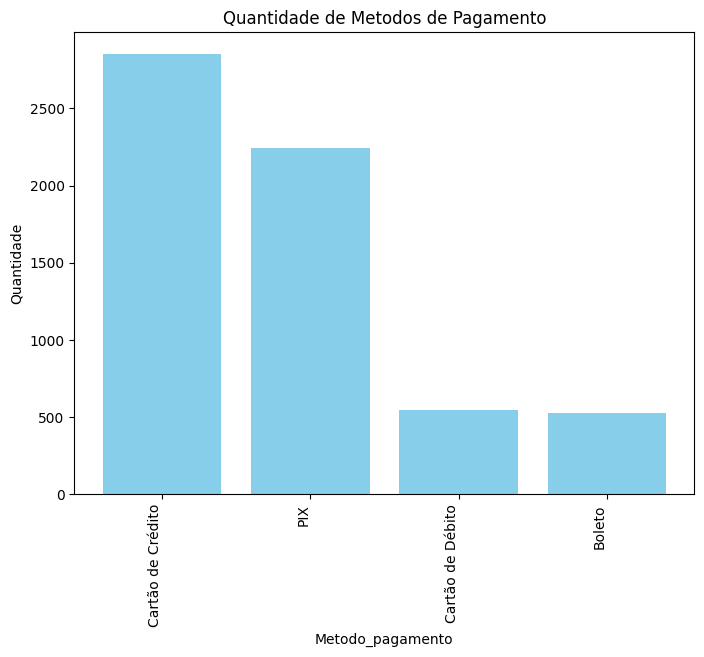

In [88]:
plt.figure(figsize=(8, 6))
plt.bar(metodos_de_pagamento['Metodo_pagamento'], metodos_de_pagamento['Quantidade'], color='skyblue')
plt.title('Quantidade de Metodos de Pagamento')
plt.xlabel('Metodo_pagamento')
plt.ylabel('Quantidade')
plt.xticks(rotation=90, ha='right')
plt.show()

<font color="7b71ff" size=4> Comentários: </font>

---

Nós conseguimos observar que mesmo sem especificar o tipo de gráfico, pelo modo que apresentamos os dados ao ChatGPT ele conseguiu representar com sucesso um visual que traga as informações desejadas. Um gráfico de colunas realmente é o ideal para representação das quantidades de uma ou mais categorias de dados.

Vamos ajustar aos poucos os visuais para que fiquem adequados para o nosso público e que tenha a identidade visual da empresa.

## **2.2 - Comparando dados**

---



Agora que já criamos nosso primeiro visual, podemos prosseguir com a construção dos próximos visuais. Aqui, vamos focar em gráficos de comparação para responder a mais dois questionamentos.

### **2º Questionamento:** Qual foi o faturamento por categoria em 2023?

**Observação:** Para o faturamento, vamos considerar aqui o produto entre o preço unitário e a quantidade somadas ao frete de cada produto.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Temos um DataFrame chamado "df" e queremos construir um visual de gráfico de barras horizontais que apresente o faturamento por categoria da Zoop.

Em "df", temos as colunas:
* categoria: categorias dos produtos
* preco_unitario: preço de uma unidade do produto
* quantidade: quantidade vendida do produto
* frete: frete a ser pago no total da compra.

Desejamos criar uma visualização que apresente o faturamento de cada categoria, em que o faturamento é dado pelo produto entre o preço unitário e a quantidade somadas ao frete.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

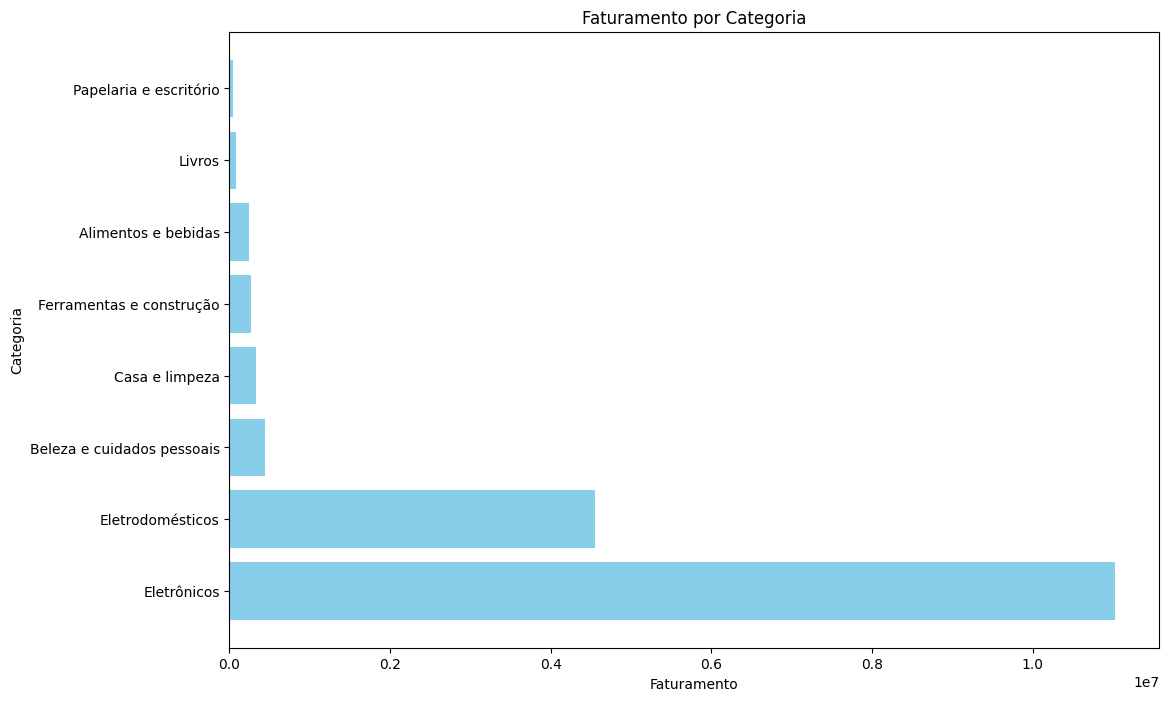

In [89]:
df['faturamento'  ] = df['preco_unitario'] * df['quantidade'] + df['frete']

faturamento_por_categoria = df.groupby('categoria')['faturamento'].sum().reset_index()
faturamento_por_categoria = faturamento_por_categoria.sort_values(by='faturamento', ascending=False)

plt.figure(figsize=(12,8))
plt.barh(faturamento_por_categoria['categoria'], faturamento_por_categoria['faturamento'], color='skyblue')
plt.xlabel('Faturamento')
plt.ylabel('Categoria')
plt.title('Faturamento por Categoria')

plt.show()

<font color="7b71ff" size=4> Comentários: </font>

---

Aqui especificamos o tipo de gráfico, guiando o ChatGPT para criação do nosso visual. Podemos notar que em um gráfico de barras o foco é maior nas categorias, além de ser uma forma mais fluida de ler textos que possam ser extensos demais para um gráfico de coluna.

### **3º Questionamento:** Como foram as vendas ao longo dos meses em 2023?

**Observação:** É importante especificar como a sua variável tempo está especificada dentro da base para o ChatGPT alcançar resultados melhores na sugestão do visual

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Temos um DataFrame chamado "df" e queremos construir um visual de gráfico de linha que apresente as vendas totais mensais da Zoop.

Em "df", temos as colunas:
* data: com as datas das compras no formato datetime (`aaaa-mm-dd`)
* faturamento: dado pelo produto entre o preço unitário e a quantidade somadas ao frete de cada venda.

Desejamos criar uma visualização que apresente as vendas por mês. Prmeiro, agrupe os dados por mês e depois crie uma nova coluna chamada "mes" que receba o nome de cada mês, traduzindo os meses do índice por meio do dicionário abaixo. Utilize a coluna "data" para o agrupamento dos dados e construção do gráfico. A coluna "mes" só deve ser utilizada para alterar os rótulos do eixo x.

```
meses = {
    'January': 'Jan',
    'February': 'Fev',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'Mai',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Set',
    'October': 'Out',
    'November': 'Nov',
    'December': 'Dez'
}
```

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

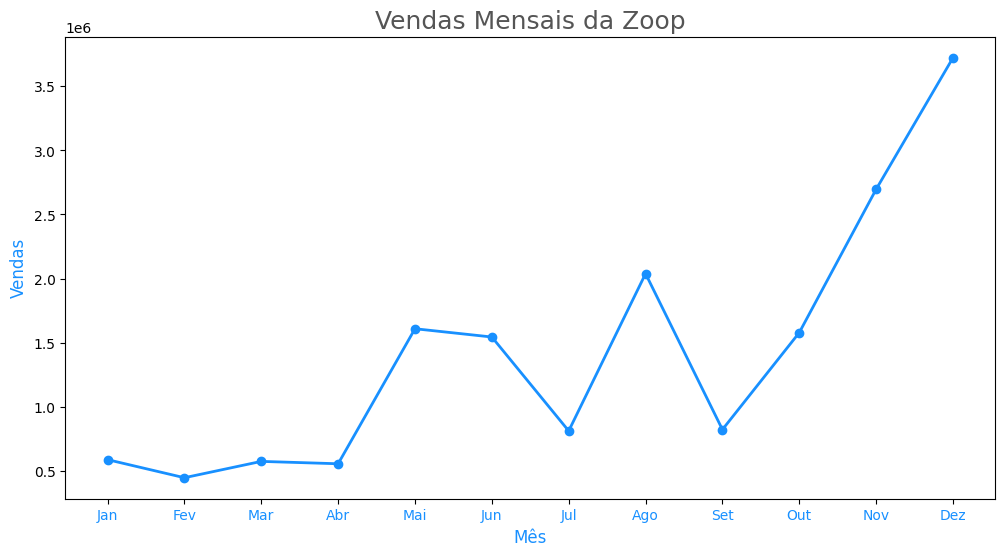

In [90]:
meses = {
    'January': 'Jan',
    'February': 'Fev',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'Mai',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Set',
    'October': 'Out',
    'November': 'Nov',
    'December': 'Dez'
}

df['mes'] = df['data'].dt.strftime('%B')
vendas_mensais = df.groupby('mes')['faturamento'].sum().reindex(meses.keys())

plt.figure(figsize=(12,6))
plt.plot(vendas_mensais.index, vendas_mensais, marker='o', color='#1890FF', linewidth=2)

plt.title('Vendas Mensais da Zoop', fontsize=18, color='#555555')
plt.xlabel('Mês', fontsize=12, color='#1890FF')
plt.ylabel('Vendas', fontsize=12, color='#1890FF')

plt.xticks(vendas_mensais.index, [meses[mes]for mes in vendas_mensais.index], fontsize=10, color='#1890FF')

plt.show()


<font color="7b71ff" size=4> Comentários: </font>

---

Quando possuimos uma quantidade de períodos maior para os nossos dados, vale a pena recorrer a gráficos de linha(s) que é ideal para séries temporais. Como nossos dados são mensais, utilizar um gráfico de colunas, por exemplo, reduziria a percepção de uma sequência dos dados. Linhas dão uma maior sensação de continuidade.

Sinta-se livre para elaborar algumas hipóteses dos momentos de alta e baixa das compras.

## **2.3 - Compondo dados dinâmicos**

---



Construimos alguns visuais interessantes para comparação dos dados, trazendo os faturamentos da Zoop. Agora, vamos partir para um nova categoria de visuais: composição.

Vamos uma composição dinâmica dos dados. Para isso, vamos adicionar mais variáveis à análise, trazendo 3 diferentes variáveis sendo uma delas categórica.

[texto do link](https:// [texto do link](https://))### **4º Questionamento:**
# Nova seção
# 1.   Item da lista
2.   Item da lista

Como esta dividida a venda por trimestre por método de pagamento? Existe um período em que algum tipo de pagamento se sobressai?

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Temos um DataFrame chamado "df" e queremos construir um visual de gráfico de barras empilhadas que apresente as vendas por trimestre em relação ao método de pagamento da Zoop.

Em "df", temos as colunas:
* data: com as datas das compras no formato datetime (`aaaa-mm-dd`)
* faturamento: com os valores das vendas
* metodo_pagamento: com o método de pagamento escolhido na compra

Desejamos criar uma visualização que apresente as vendas por trimestre, agrupando os métodos de pagamento de cada trimestre correspondente a cada compra.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

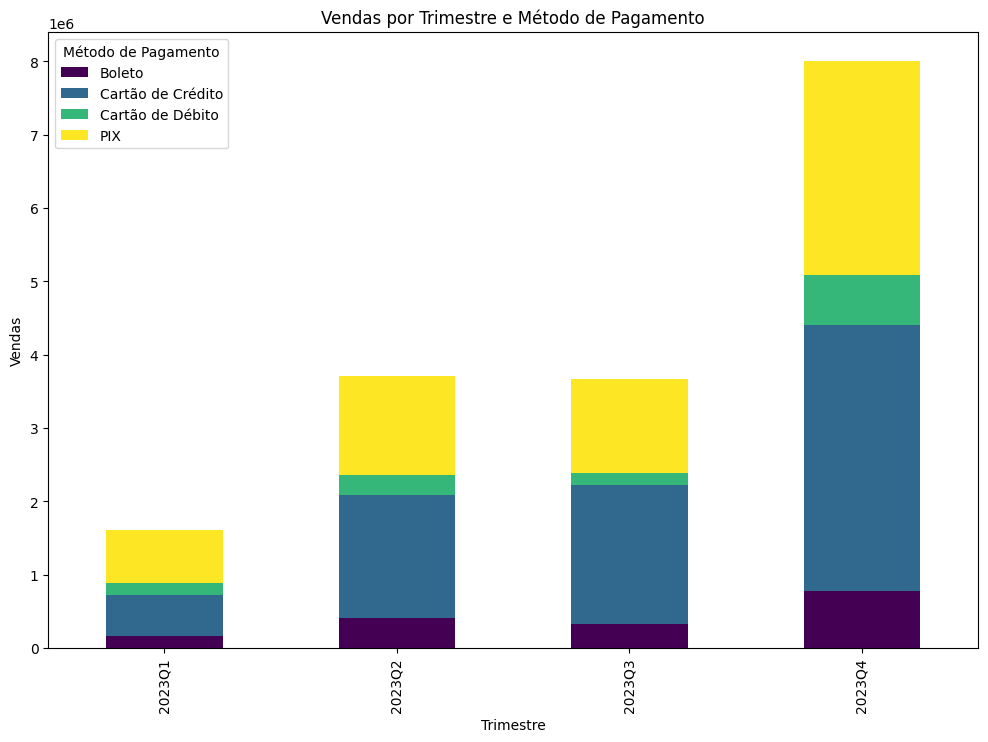

In [91]:
df['trimestre'] = df['data'].dt.to_period('Q')

vendas_por_trimestre = df.groupby(['trimestre', 'metodo_pagamento'])['faturamento'].sum().unstack()

vendas_por_trimestre.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

plt.title('Vendas por Trimestre e Método de Pagamento')
plt.xlabel('Trimestre')
plt.ylabel('Vendas')
plt.legend(title='Método de Pagamento')

plt.show()

<font color="7b71ff" size=4> Comentários: </font>

---

O gráfico de colunas empilhadas adiciona à comparação entre períodos ou categorias a comparação também entre os dados de cada período/categoria. É como se colocássemos uma "lupa" em cada coluna e vizualizássemos a composição de cada uma delas de acordo com a variável desejada (aqui, as formas de pagamento).

Sinta-se livre para elaborar algumas hipóteses das vendas pelo trimestre combinados ao tipo de pagamento e quais insights podemos retirar dessa base.

# **Aula 3 - Gerando mais visuais**




Agora, vamos nos concentrar nos questionamentos voltados ao perfil dos(as) clientes, como avaliam as compras dentro da Zoop e se participam de nosso programa de cashback.

## **3.1 - Compondo dados estáticos**

---



Vamos inicialmente trazer um exemplo de como podemos utilizar a comparação de dados estáticos, ou seja, um recorte do tempo ou das variáveis que possuímos.

### **5º Questionamento:** Qual a proporção da clientela que participa de nosso programa de cashback?

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Temos um DataFrame chamado "df" e queremos construir um visual que apresente a proporção dos(as) usuários(as) que estão aderindo o programa de cashback da Zoop.

Em "df", temos a coluna "cashback" que dispõe de tais dados.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

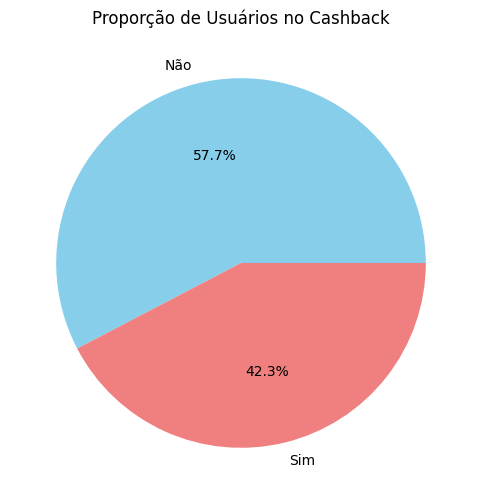

In [92]:
proporcao_cashback = df['cashback'].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
plt.pie(proporcao_cashback, labels=proporcao_cashback.index, autopct='%1.1f%%', colors=['skyblue' ,'lightcoral'])
plt.title('Proporção de Usuários no Cashback')
plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Você conseguiria inverter as cores e alterar o gráfico anterior para um do tipo rosca?

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

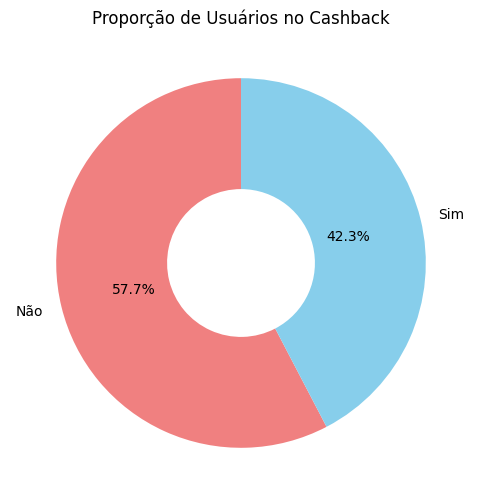

In [93]:
proporcao_cashback = df['cashback'].value_counts(normalize=True)

plt.figure(figsize=(6, 6))
plt.pie(proporcao_cashback, labels=proporcao_cashback.index, autopct='%1.1f%%', colors=['lightcoral' ,'skyblue'],
        startangle=90, wedgeprops=dict(width=0.6))
plt.title('Proporção de Usuários no Cashback')


plt.show()

<font color="7b71ff" size=4> Comentários: </font>

---

Olha só! Mais uma vez a IA nos apresentou uma boa noção de qual gráfico aplicar para esse ponto, mas você conseguiu notar que "ela" não faz ideia dos dados que possuímos?

Precisamos estar atentos(as) a isso, pois passamos apenas os nomes das colunas e que dados existiam lá. Ela não consegue saber o que é um valor de caráter positivo ou negativo, por exemplo. Por isso, o "não" estava em azul e o "sim" em vermelho.  No prompt seguinte, demos uma orientação para inverter as cores (ainda sem falar o real valor dos dados) e pedimos uma alteração do visual.

Que tal você experimentar fazer outros pedidos e ver como o ChatGPT se comporta?

Falando do gráfico, gráficos de setores são ideiais para poucas categorias de dados, se possível dados dicotômicos (2 categorias, como sim e não, gato e cachorro...). Eles representam a proporção dos dados de maneira estática.

## **3.2 - Distribuindo dados**

---



Com o auxílio da IA, vamos gerar mais alguns gráficos que serão importantes na construção do storytelling do relatório da Zoop como requisitado. Partindo agora, da distribuição de dados, vamos analisar o perfil dos clientes e como eles avaliam as compras na Zoop

### **6º Questionamento:** Como estão distribuidas as avaliações de produto? Temos bons números gerais?

Vamos pedir ao ChatGPT para nos auxiliar na construção desse visual. Vamos ver se esta IA consegue representar tais dados com um visual adequado.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Temos um DataFrame chamado "df" e queremos construir um visual que apresente a distribuição das avaliações do público em relação as compras feitas na loja online.

Em "df", temos a coluna "avaliacao_compra" com as notas dadas por cada usuário em relação a compra que fizeram que variam de 0 a 10 em números inteiros.

Desejamos criar uma visualização que apresente a distribuição desses dados.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

<function matplotlib.pyplot.show(close=None, block=None)>

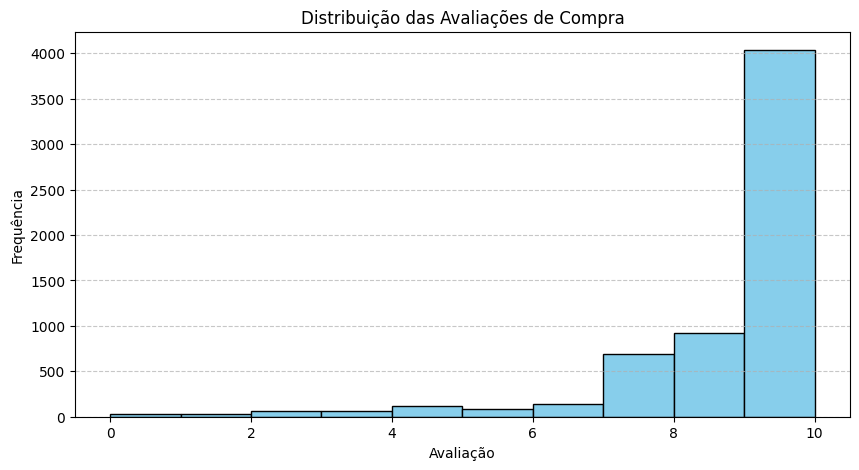

In [94]:
plt.figure(figsize=(10, 5))
plt.hist(df['avaliacao_compra'], bins=10, edgecolor='black', color='skyblue')
plt.title('Distribuição das Avaliações de Compra')
plt.xlabel('Avaliação')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show

<font color="7b71ff" size=4> Comentários: </font>

---

Mais uma vez não precisamos especificar diretamente o tipo de gráfico, pois ao citar distribuição de valores numéricos de uma simples coluna o ChatGPT conseguiu interpretar e trazer o código para um histograma de coluna. Este gráfico é ideal para apresentar a distribuição de uma amostra de dados ou população. Cada coluna aqui representa a frequência de repetição de um valor.

Quer experimentar fazendo o mesmo apenas com as idades?

## **3.3 - Distribuindo por característica**

---



Vamos agora para a criação do nosso último visual. Subindo mais um degrau na distribuição de dados, iremos adcionar uma variável categórica ao problema. Vamos ver como a IA se comporta aqui?

### **7º Questionamento:** Como está distribuído o nosso público por idade e sexo biológico? Existe um grupo que sobressai?

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Temos um DataFrame chamado "df" e queremos construir um visual que apresente a distribuição do nosso público por idade e sexo biológico.

Em "df", temos as colunas:
* idade: idade da pessoa que realizou a compra
* sexo_biologico: sexo biológico da pessoa que realizou a compra, com dados categóricos

Desejamos criar uma visualização que apresente a distribuição desses dados.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

<ipython-input-95-6d08c465b2de>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sexo Biológico')


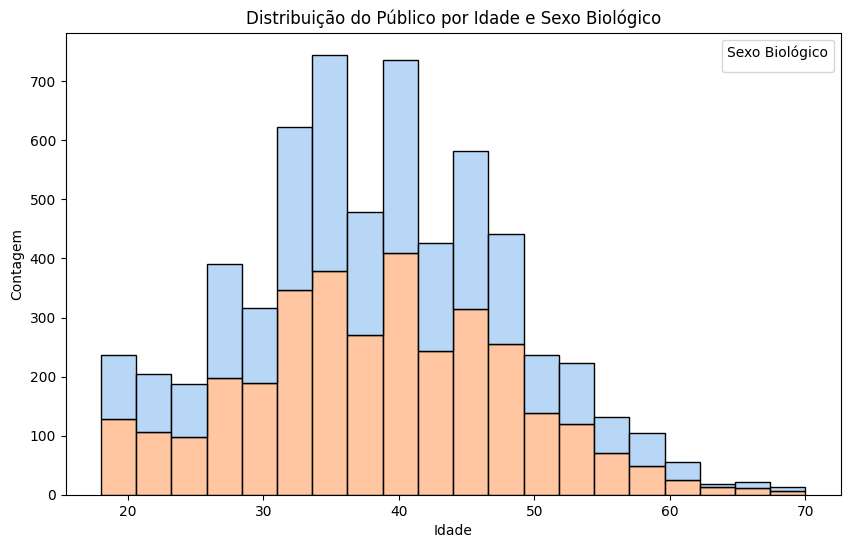

In [95]:

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='idade', hue='sexo_biologico', multiple='stack', bins=20, palette='pastel')
plt.title('Distribuição do Público por Idade e Sexo Biológico')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.legend(title='Sexo Biológico')
plt.show()

O gráfico gerado é pouco prático, pois compila os dados do sexo biológico "Masculino" e "Feminino" em uma mesma barra! Precisamos trazer mais uma instrução ao GPT para escolher um visual mais adequado.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Acho que podemos melhorar esse gráfico. Que tal mudar para um boxplot?

<ipython-input-61-d614bd389944>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sexo_biologico', y='idade', palette='pastel')


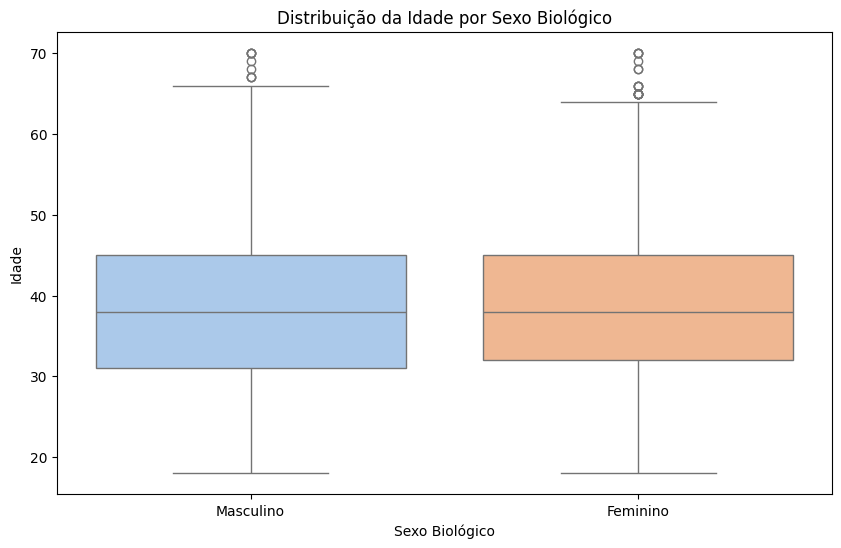

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sexo_biologico', y='idade', palette='pastel')
plt.title('Distribuição da Idade por Sexo Biológico')
plt.xlabel('Sexo Biológico')
plt.ylabel('Idade')
plt.show()

<font color="7b71ff" size=4> Comentários: </font>

---

Dessa vez foi necessário guiar a IA a fim de gerar um visual melhor para nossas análises.

O gráfico aqui representado é um boxplot (diagrama de caixa) que é ideal para representar um conjunto de dados de acordo com 5 medidas de interesse: valor máximo, mínimo, 1º quartil (onde estão situados os primeiros 25% dos dados), 2º quartil ou mediana (onde estão situados 50% dos dados) e 3º quartil (onde estão situados 75% dos dados).

Lembra do `describe()`? Este gráfico apresenta em um único elemento boa parte dos dados que a função exibe em tabela.

Concluímos a 1ª versão dos 7 visuais que utilizaremos em nosso projeto. Agora, vamos partir para a aplicação das técnicas de storytelling para melhorar os visuais e deixá-los com a identidade visual da Zoop antes da exportação.


# **Aula 4 - Técnicas de storytelling**




## **4.1 - Definindo as cores do projeto**

---



Agora, vamos explorar a importância das cores na visualização de dados, discutir como as pessoas percebem e interpretam as informações visuais, e abordar a diferença entre a capacidade da inteligência artificial e a visão humana no que diz respeito à escolha de cores e acessibilidade.

### Paleta de cores da Zoop:

<img src="https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/zoop_paleta_cores.png" alt="inserir alt" width=480>

&nbsp;

#### Paleta do projeto

|Vermelho|||
|------|------|------|
| VERMELHO_1 |VERMELHO_2 |VERMELHO_3 |
|#e23155 | #cc2c4e| #b32742 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_3.png) |

&nbsp;

|Azul|||
|------|------|------|
| AZUL_1 |AZUL_2 |AZUL_3 |
|#203f75 | #1c3867| #19325b |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_3.png) |

&nbsp;

|Cinza||||||
|------|------|------|------|------|------|
|BRANCO| CINZA_1 |CINZA_2 |CINZA_3 |CINZA_4 |CINZA_5 |
|#ffffff | #ebebeb | #d9d9d9| #cccccc | #555655| #231f20 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/BRANCO.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_1.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_3.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_4.png)|![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_5.png)|

&nbsp;

|Aqua|||
|------|------|------|
| AQUA_1 |AQUA_2 |AQUA_3 |
|#addcd4 | #9fccc5| #96bfb9 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_3.png) |

&nbsp;


In [96]:
# Adicionando as cores como variáveis do projeto
VERMELHO_1,	VERMELHO_2,	VERMELHO_3 = "#e23155",	"#cc2c4e", "#b32742"
AZUL_1,	AZUL_2,	AZUL_3 = "#203f75",	"#1c3867", "#19325b"
BRANCO,	CINZA_1, CINZA_2, CINZA_3, CINZA_4,	CINZA_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc", "#555655", "#231f20"
AQUA_1,	AQUA_2,	AQUA_3 = "#addcd4",	"#9fccc5", "#96bfb9"

<font size=5> ***Por que definimos nós mesmos as cores do projeto?*** </font>

1. **Percepção humana das cores:**

Nosso cérebro interpreta as cores de maneira única, associando emoções e significados a cada tonalidade. É importante na escolha das cores para representar dados considerar a percepção humana para garantir que as informações sejam transmitidas de maneira clara e eficaz. Além de seguir a identidade visual da Zoop, ou seja, deixar aquela sensação de que aquele visual é da Zoop.

2. **Acessibilidade:**

Certas combinações de cores podem ser difíceis de serem percebidas por pessoas com deficiências visuais. Nossa responsabilidade como desenvolvedores é garantir que nossas visualizações sejam inclusivas. Vamos seguir aqui algumas diretrizes e recomendações para criar gráficos acessíveis.

3. **IA vs. escolha de cores:**

Enquanto a IA pode realizar tarefas complexas, como análise de dados e reconhecimento de padrões, ela ainda não possui o discernimento humano quando se trata de escolher cores significativas e garantir a acessibilidade. É aqui que nossa intervenção criativa e consideração humana entram em cena.

4. **Experiência visual:**

As pessoas conseguem entender as informações transmitidas pelos gráficos? Existe alguma "briga" entre as cores que prejudica a clareza da mensagem? Vamos explorar técnicas para melhorar a experiência visual, como contraste adequado, pela escolha cuidadosa das cores da paleta e destaque de elementos-chave.

Vamos agora mergulhar na prática e incorporar esses conceitos ao nosso projeto?

## **4.2 - Adicionando rótulos e labels**

---



Já criamos anteriormente os 7 visuais e definimos as cores do projeto. Agora, vamos escolher apenas um dos visuais para compreender como podemos utilizar a IA para adicionar as cores ideais, os rótulos dos dados, títulos e labels dos eixos.

Vamos então pegar o código daquele primeiro gráfico (**Métodos de pagamento utilizados**) e explorar essas alterações por meio da utilização da IA

In [99]:
# Visualização
plt.figure(figsize=(10, 6))
plt.bar(metodos_de_pagamento['Metodo de Pagamento'], metodos_de_pagamento['Quantidade'], color='skyblue')
plt.title('Quantidade de Métodos de Pagamento Utilizados')
plt.xlabel('Método de Pagamento')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')

# Exibir o gráfico
plt.show()

KeyError: 'Metodo de Pagamento'

<Figure size 1000x600 with 0 Axes>

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Agora chegou a hora de refinarmos as nossas visualizações. Vamos começar com o 1º gráfico que fizemos, aquele com os métodos de pagamento?

O nosso gráfico precisa seguir a identidade visual da Zoop, com o fundo da figura e do plot na cor CINZA_1, as colunas na cor VERMELHO_1 e o tamanho da figura deve ser de (10, 6).

O título da figura é "Métodos de pagamentos mais utilizados em 2023" com tamanho 18 e sua cor CINZA_5.

Os rótulos do eixo y (yticks) devem ser suprimidos assim como o label do eixo y (ylabel) e os rótulos e label do eixo X (xticks e xlabel) devem ter tamanho 12 com a cor AZUL_1. As bordas do topo, lado direito e esquerdo do gráfico devem ser suprimidas.

Além disso, é necessário exibir o total de cada método de pagamento acima de cada coluna, com o texto também na cor AZUL_1 e tamanho 12.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização. Lembre-se que as variáveis das cores que estamos utilizando possui valores de cores já em hexadecimal.

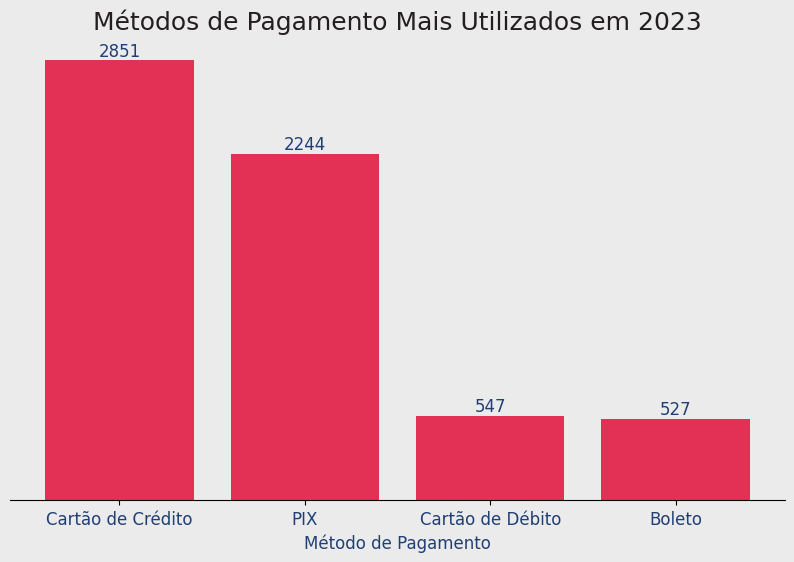

In [100]:
metodos_de_pagamento = df['metodo_pagamento'].value_counts()

plt.figure(figsize=(10, 6), facecolor=CINZA_1)
ax = plt.axes()
ax.set_facecolor(CINZA_1)
plt.bar(metodos_de_pagamento.index, metodos_de_pagamento.values, color=VERMELHO_1)

for i, v in enumerate(metodos_de_pagamento):
    plt.text(i, v+0.1, str(v), ha='center', va='bottom', fontsize=12, color=AZUL_1)


plt.title('Métodos de Pagamento Mais Utilizados em 2023', fontsize=18, color=CINZA_5)
plt.xticks(fontsize=12, color=AZUL_1)
plt.yticks([])
plt.xlabel('Método de Pagamento', fontsize=12, color=AZUL_1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

<font color="7b71ff" size=4> Comentários: </font>

---

Uau! Parece outro gráfico não é mesmo?

Retiramos muitos elementos distratores e adicionamos apenas a informação que nos interessava. Além disso mudamos o visual de um estado genérico para um formato que casa com a identidade da Zoop, deixando nosso gráfico pronto para ser utilizado, por exemplo, no relatório das vendas.

Mais a frente traremos essas ações para os outros visuais. O nosso foco aqui é entender as técnicas de storytelling e como aliar elas a IA pode ser bastante útil.

## **4.3 - Adicionando textos**

---



Já refinamos um dos gráficos na etapa anterior. Agora, vamos trazer esse gráfico, adicionando mais um elemento que pode ser importante às análises: textos informativos. Vamos utilizar a IA novamente para esse processo.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

O gráfico ficou muito bom!

Agora quero adicionar um texto dentro da área do plot, vamos lá?

Para isso, some os valores das duas primeiras colunas, divida pela soma de totas as colunas e passe para o formato de porcentagem armazenando na variável "percentual"

Agora, na posição x = 2 e y = 2500, adicione o seguinte texto com tamanho 10 e cor AZUL_3: `f"$\\bf{percentual:.2f}$% dos clientes utilizam Cartão de Crédito ou PIX \npara pagamento. Seria interessante recorrer a parcerias\ncom bancos para a construção de um Zoop Pay a fim\nde fidelizar a nossa clientela."`.

<ipython-input-102-776ead88802b>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentual = (metodos_de_pagamento[0] + metodos_de_pagamento[1]) / total_clientes * 100


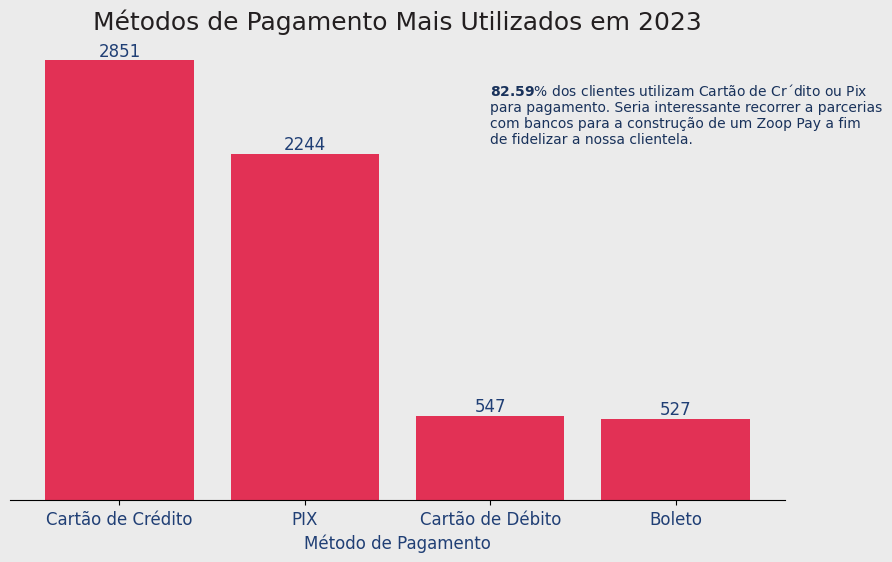

In [102]:
metodos_de_pagamento = df['metodo_pagamento'].value_counts()

total_clientes = metodos_de_pagamento.sum()
percentual = (metodos_de_pagamento[0] + metodos_de_pagamento[1]) / total_clientes * 100

plt.figure(figsize=(10, 6), facecolor=CINZA_1)
ax = plt.axes()
ax.set_facecolor(CINZA_1)
plt.bar(metodos_de_pagamento.index, metodos_de_pagamento.values, color=VERMELHO_1)

for i, v in enumerate(metodos_de_pagamento):
    plt.text(i, v+0.1, str(v), ha='center', va='bottom', fontsize=12, color=AZUL_1)

plt.text(2, 2500, f"$\\bf{percentual:.2f}$% dos clientes utilizam Cartão de Cr´dito ou Pix \npara pagamento. Seria interessante recorrer a parcerias\ncom bancos para a construção de um Zoop Pay a fim\nde fidelizar a nossa clientela.",
         ha='left', va='center', color=AZUL_3, fontsize=10)

plt.title('Métodos de Pagamento Mais Utilizados em 2023', fontsize=18, color=CINZA_5)
plt.xticks(fontsize=12, color=AZUL_1)
plt.yticks([])
plt.xlabel('Método de Pagamento', fontsize=12, color=AZUL_1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

<font color="7b71ff" size=4> Comentários: </font>

---

Aproveitamos a área útil para trazer um *insight* que tivemos ao descrever os dados dos métodos de pagamento. Isso já aumenta e muito a relevância do dado representado e fornece mais informação a quem lê.

## **4.4 - Adicionando elementos visuais**

---



Bem bacana o uso dos textos informativos, não é mesmo? E se agora nós adicionarmos outros elementos visuais a um de nossos gráficos?

Vamos escolher agora o gráfico de linha (**Vendas totais mensais da Zoop**) e aplicar mais uma técnica a ele por meio da utilização da IA .

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Dicionário de tradução de meses
meses = {
    'January': 'Jan',
    'February': 'Fev',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'Mai',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Set',
    'October': 'Out',
    'November': 'Nov',
    'December': 'Dez'
}

# Agrupar por mês e calcular as vendas totais
df['mes'] = df['data'].dt.strftime('%B')
vendas_mensais = df.groupby('mes')['faturamento'].sum().reindex(meses.keys())

# Configurações do gráfico
plt.figure(figsize=(12, 6))
plt.plot(vendas_mensais.index, vendas_mensais, marker='o', color='#1890FF', linewidth=2)

# Adicionar rótulos e título
plt.title('Vendas Totais Mensais da Zoop', fontsize=18, color='#555555')
plt.xlabel('Mês', fontsize=12, color='#1890FF')
plt.ylabel('Vendas', fontsize=12, color='#1890FF')

# Alterar rótulos do eixo x utilizando o dicionário de tradução
plt.xticks(vendas_mensais.index, [meses[mes] for mes in vendas_mensais.index], fontsize=10, color='#1890FF')

plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Vamos explorar mais um dos gráficos que fizemos? Agora vamos utilizar aquele com as Vendas totais mensais da Zoop. A variável que passa os valores mensais é:

```
df['mes'] = df['data'].dt.strftime('%B')
vendas_mensais = df.groupby('mes')['faturamento'].sum().reindex(meses.keys())
```

Em que `df["data"]` correspondente as datas no formato datetime e `df['faturamento']` os valores das vendas.

E o que gerou o gráfico original foi

```
plt.plot(vendas_mensais.index, vendas_mensais, marker='o', color='#1890FF', linewidth=2)
```

O nosso gráfico precisa seguir a identidade visual da Zoop, com o fundo da figura e do plot na cor CINZA_1, a linha na cor AZUL_1 e o tamanho da figura deve ser de (12, 6).

O título da figura é "Vendas totais mensais em 2023" com tamanho 18 e sua cor CINZA_5.

Os rótulos do eixo y (yticks) devem estar o formato "R$ valor M" com duas casas decimais, tamanho 12 e cor AZUL_1.

Os rótulos do eixo X (xticks) devem ter tamanho 12 com a cor AZUL_1. Já os labels do eixo x e y (xlabel e ylabel) devem ser suprimidos. As bordas do topo e lado direito do gráfico devem ser suprimidas.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização. Lembre-se que as variáveis das cores que estamos utilizando possui valores de cores já em hexadecimal.

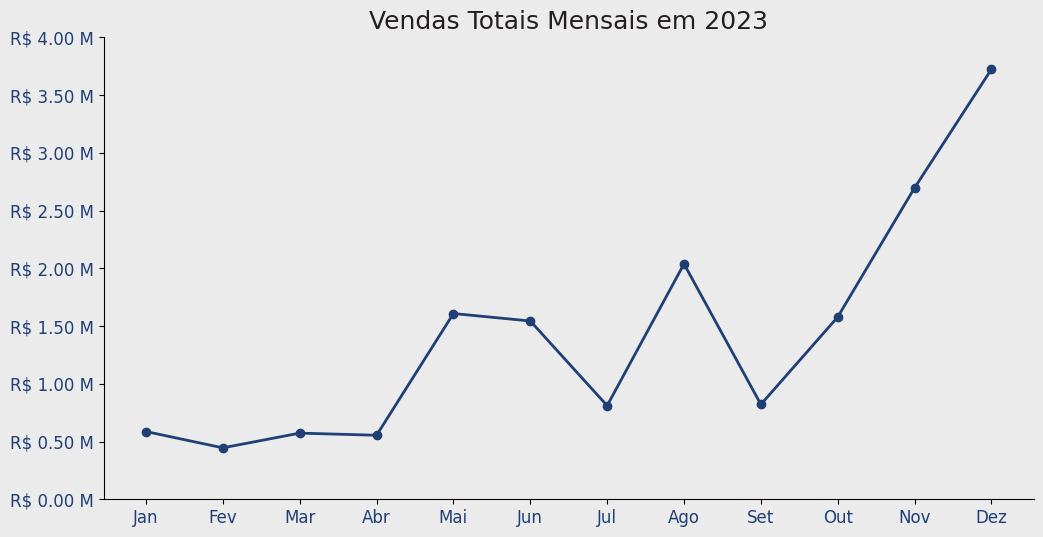

In [103]:
meses = {
    'January': 'Jan',
    'February': 'Fev',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'Mai',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Set',
    'October': 'Out',
    'November': 'Nov',
    'December': 'Dez'
}

# Agrupar por mês e calcular as vendas totais
df['mes'] = df['data'].dt.strftime('%B')
vendas_mensais = df.groupby('mes')['faturamento'].sum().reindex(meses.keys())

plt.figure(figsize=(12, 6), facecolor=CINZA_1)
ax = plt.axes()
ax.set_facecolor(CINZA_1)
plt.plot(vendas_mensais.index, vendas_mensais, marker='o', color=AZUL_1, linewidth=2)

plt.title('Vendas Totais Mensais em 2023', fontsize=18, color=CINZA_5)
plt.xlabel('')
plt.ylabel('')

formatted_yticks = ['R$ {:.2f} M'.format(val / 1e6) for val in ax.get_yticks()]
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(formatted_yticks, fontsize=12, color=AZUL_1)

plt.xticks(vendas_mensais.index, [meses[mes] for mes in vendas_mensais.index], fontsize=12, color=AZUL_1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Bacana! Agora que o nosso gráfico já está com a identidade visual, vamos adicionar alguns elementos visuais.

Desenhe 4 círculos de raio 200, transparentes com a borda na cor VERMELHO_1 e  com o centro nas coordenadas do 5º, 8º, 11º e 12º  pontos, respectivamente. No lado esquerdo de cada círculo enumere de 1 a 4.

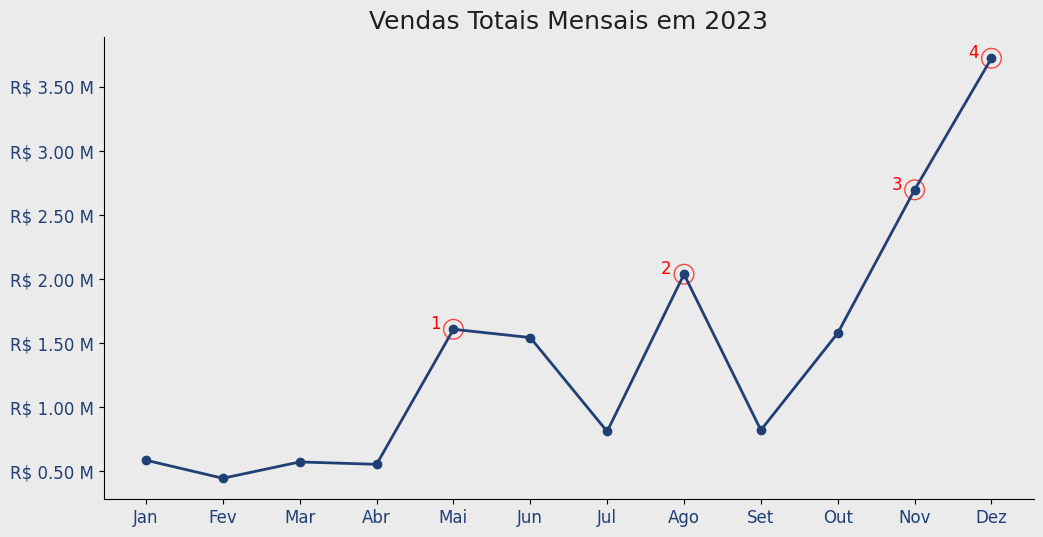

In [107]:
meses = {
    'January': 'Jan',
    'February': 'Fev',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'Mai',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Set',
    'October': 'Out',
    'November': 'Nov',
    'December': 'Dez'
}

# Agrupar por mês e calcular as vendas totais
df['mes'] = df['data'].dt.strftime('%B')
vendas_mensais = df.groupby('mes')['faturamento'].sum().reindex(meses.keys())

plt.figure(figsize=(12, 6), facecolor=CINZA_1)
ax = plt.axes()
ax.set_facecolor(CINZA_1)
plt.plot(vendas_mensais.index, vendas_mensais, marker='o', color=AZUL_1, linewidth=2)

plt.title('Vendas Totais Mensais em 2023', fontsize=18, color=CINZA_5)
plt.xlabel('')
plt.ylabel('')

formatted_yticks = ['R$ {:.2f} M'.format(val / 1e6) for val in ax.get_yticks()]
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(formatted_yticks, fontsize=12, color=AZUL_1)

plt.xticks(vendas_mensais.index, [meses[mes] for mes in vendas_mensais.index], fontsize=12, color=AZUL_1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Lista correta de pontos
for i, point in enumerate([(4, vendas_mensais.iloc[4]),
    (7, vendas_mensais.iloc[7]),
    (10, vendas_mensais.iloc[10]),
    (11, vendas_mensais.iloc[11])], start=1):
    plt.scatter(point[0], point[1], s=200, color='none', edgecolors='red', alpha=0.7)
    plt.text(point[0] - 0.3, point[1] + 0.1, str(i), fontsize=12, color='red')


plt.show()

<font color="7b71ff" size=4> Comentários: </font>

---

Adicionamos 4 círculos representando os pontos com maior volume de vendas da Zoop em 2023. Podemos pensar em algumas hipóteses:


1.   No mês de Maio, temos uma das datas mais relevantes em vendas: Dia das mães; o que pode justificar o aumento das vendas da Zoop
1.   No mês de Agosto, temos 2 situações que podem justificar, a volta às aulas no 2º semestre em alguns estados brasileiros e o Dia dos Pais.
3.   No mês de Novembro, fica o destaque a Black Friday um dos principais períodos de alta das vendas, considerado de grande relevância ao Varejo.
4.   No mês de Dezembro, temos o Natal e as festividades de Ano Novo. considerados, não só na Zoop, o período de maior vendas do Varejo.

Fica como dica investigar mais os dados e chegar as suas próprias conclusões.

Concluímos assim 2 visuais aplicando as técnicas de storytelling, deixando-os com a identidade visual da Zoop e complementando-os com informações relevantes para a interpretação dos dados. Agora, vamos seguir ajustando os outros 5 visuais para no final partimos para a exportação dos gráficos.

# **Aula 5 - Concluindo o projeto**




## **5.1 - Ajustando os visuais de comparação**

---



Antes de ajustarmos os últimos 5 visuais de nosso projeto, vamos fazer uma pequena modificação nos 2 primeiros passando-os para função, o que facilitará mais a frente quando realizarmos a exportação dos visuais.



### **Gráfico 1 - Métodos de pagamentos mais utilizados em 2023:**

In [108]:
def metodos_pag():
  # Agrupar por método de pagamento e contar o total de ocorrências
  metodos_de_pagamento = df['metodo_pagamento'].value_counts()

  # Calcular percentual
  total_clientes = metodos_de_pagamento.sum()
  percentual = (metodos_de_pagamento[0] + metodos_de_pagamento[1]) / total_clientes * 100

  # Configurações do gráfico
  plt.figure(figsize=(10, 6), facecolor=CINZA_1)
  ax = plt.axes()
  ax.set_facecolor(CINZA_1)
  plt.bar(metodos_de_pagamento.index, metodos_de_pagamento, color=VERMELHO_1)

  # Adicionar texto com o total acima de cada barra
  for i, v in enumerate(metodos_de_pagamento):
      plt.text(i, v + 0.1, str(v), ha='center', va='bottom', color=AZUL_1, fontsize=12)

  # Adicionar texto dentro da área do plot
  plt.text(2, 2500, f"$\\bf{percentual:.2f}$% dos clientes utilizam Cartão de Crédito ou PIX \npara pagamento. Seria interessante recorrer a parcerias\ncom bancos para a construção de um Zoop Pay a fim\nde fidelizar a nossa clientela.",
          ha='left', va='center', color=AZUL_3, fontsize=10)

  # Configurações adicionais
  plt.title('Métodos de Pagamentos mais Utilizados em 2023', fontsize=18, color=CINZA_5)
  plt.xticks(fontsize=12, color=AZUL_1)
  plt.yticks([])
  plt.xlabel('Método de Pagamento', fontsize=12, color=AZUL_1)
  ax.spines[['top', 'right', 'left']].set_visible(False)
  plt.grid(False)

  return plt

### **Gráfico 2 - Vendas totais mensais em 2023:**

In [109]:
def vendas_mensais():
  # Dicionário de tradução de meses
  meses = {'January': 'Jan', 'February': 'Fev', 'March': 'Mar', 'April': 'Abr',
           'May': 'Mai', 'June': 'Jun', 'July': 'Jul', 'August': 'Ago',
           'September': 'Set', 'October': 'Out', 'November': 'Nov', 'December': 'Dez'}

  # Agrupar por mês e calcular as vendas totais
  df['mes'] = df['data'].dt.strftime('%B')
  vendas_mensais = df.groupby('mes')['faturamento'].sum().reindex(meses.keys())

  # Configurações do gráfico
  plt.figure(figsize=(12, 6), facecolor=CINZA_1)
  ax = plt.axes()
  ax.set_facecolor(CINZA_1)
  plt.plot(vendas_mensais.index, vendas_mensais, marker='o', color=AZUL_1, linewidth=2)

  # Adicionar rótulos e título
  plt.title('Vendas Totais Mensais em 2023', fontsize=18, color=CINZA_5)
  plt.xlabel('')
  plt.ylabel('')

  # Formatando rótulos do eixo y em "R$ valor M"
  formatted_yticks = ['R$ {:.2f} M'.format(val / 1e6) for val in ax.get_yticks()]
  ax.set_yticks(ax.get_yticks()) # para evitar o Warning
  ax.set_yticklabels(formatted_yticks, fontsize=12, color=AZUL_1)

  # Adicionar círculos numerados
  for i, point in enumerate([(4, vendas_mensais.iloc[4]), (7, vendas_mensais.iloc[7]), (10, vendas_mensais.iloc[10]), (11, vendas_mensais.iloc[11])], start=1):
      plt.scatter(point[0], point[1], s=200, color='none', edgecolors=VERMELHO_1, alpha=0.7)
      plt.text(point[0] - 0.3, point[1] + 0.1, str(i), fontsize=12, color=VERMELHO_1)

  # Configurações adicionais
  plt.xticks(vendas_mensais.index, [meses[mes] for mes in vendas_mensais.index], fontsize=12, color=AZUL_1)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  return plt

Agora que salvamos os 2 primeiros gráficos em função, vamos modificar mais um, **Faturamento por categoria de produto em 2023**, utilizando as técnicas de storytelling que já aprendemos.

### **Gráfico 3 - Faturamento por categoria de produto em 2023:**

Vamos dar prosseguimento aos gráficos gerados ao longo das aulas, partindo agora do gráfico de faturamento por categoria de produto aplicando as técnicas de storytelling que aprendemos aqui no curso por meio da utilização da IA

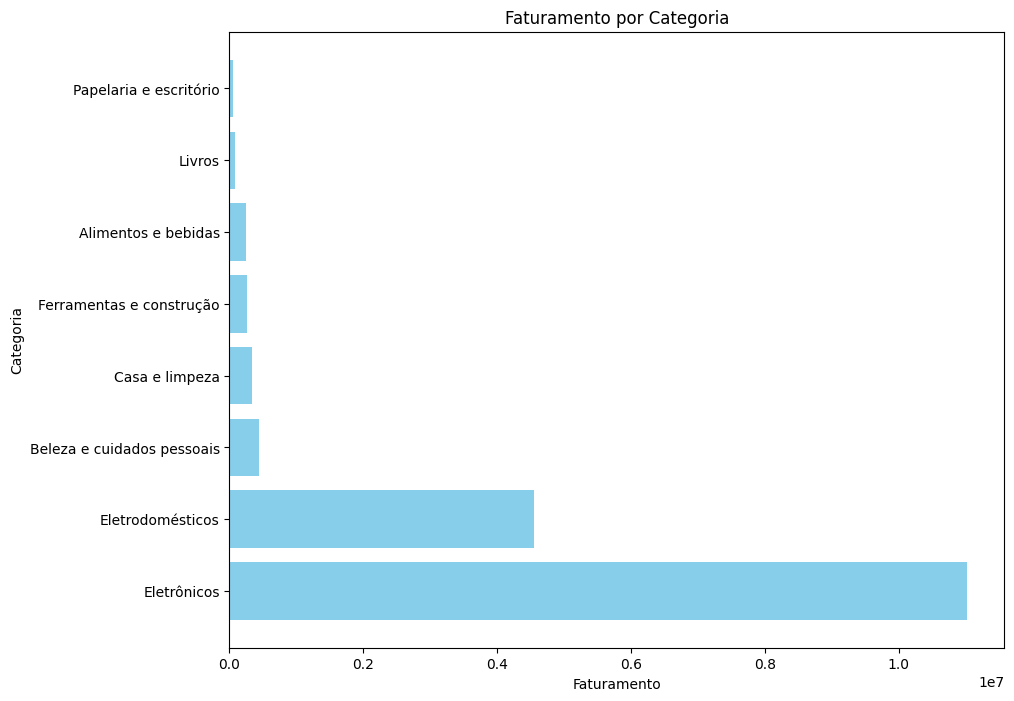

In [110]:
import matplotlib.pyplot as plt

# Calcular o faturamento para cada categoria
df['faturamento'] = (df['preco_unitario'] * df['quantidade']) + df['frete']

# Agrupar por categoria e calcular o faturamento total
faturamento_por_categoria = df.groupby('categoria')['faturamento'].sum().reset_index()

# Ordenar por faturamento
faturamento_por_categoria = faturamento_por_categoria.sort_values(by='faturamento', ascending=False)

# Visualização
plt.figure(figsize=(10, 8))
plt.barh(faturamento_por_categoria['categoria'], faturamento_por_categoria['faturamento'], color='skyblue')
plt.title('Faturamento por Categoria')
plt.xlabel('Faturamento')
plt.ylabel('Categoria')

plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Vamos partir para mais um gráfico? Agora, vamos refinar o gráfico de faturamento por categoria. Lembre que esse gráfico foi de barras horizontais.

O nosso gráfico precisa seguir a identidade visual da Zoop, com o fundo da figura e do plot na cor CINZA_1, as colunas na cor AQUA_1 e o tamanho da figura deve ser de (10, 6).

O título da figura é "Faturamento por categoria de produto em 2023" com tamanho 18 e sua cor CINZA_5.

Os rótulos do eixo x (xticks) devem ser suprimidos assim como os labels do eixo x e y (xlabel e ylabel) e os rótulos do eixo y (yticks) devem ter tamanho 12 com a cor AZUL_1. Todas as bordas do gráfico devem ser suprimidas.

Além disso, é necessário exibir o total do faturamento de cada categoria do lado direito de cada barra, com o texto também na cor AZUL_1 e tamanho 12.

Vamos adicionar também um texto dentro da área do plot. Para isso, divida o valor da 1ª barra pela soma de todas as barras e passe para o formato de porcentagem armazenando na variável "percentual"

Agora, na posição x = 0.4e7 e y = 5, adicione o seguinte texto com tamanho 12 e cor AZUL_3: `f"$\\bf{percentual:.2f}$% das vendas correspondem apenas as vendas de Eletrônicos.\nIsso é equivalente a quase o dobro em relação a todas as outras categorias\npresentes no portfólio da Zoop."`.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

In [119]:
def faturamento_por_categoria():

  # Calcula o faturamento por categoria
  faturamento_por_categoria = df.groupby('categoria')['faturamento'].sum().sort_values(ascending=False)

  # Calcula o total e o percentual da categoria com maior faturamento
  total_faturamento = faturamento_por_categoria.sum()
  percentual = faturamento_por_categoria.iloc[0] / total_faturamento * 100

  # Criação da figura
  plt.figure(figsize=(10, 6), facecolor=CINZA_1)
  ax = plt.axes()
  ax.set_facecolor(CINZA_1)

  # Criação do gráfico de barras horizontais
  bars = ax.barh(faturamento_por_categoria.index, faturamento_por_categoria, color=AQUA_1)

  # Título e formatação dos eixos
  plt.title('Faturamento por categoria de produto em 2023', fontsize=18, color=CINZA_5)
  plt.xlabel('')
  plt.ylabel('')
  plt.yticks(fontsize=12, color=AZUL_1)
  plt.xticks([])

  # Remove as bordas do gráfico
  for spine in ['top', 'right', 'left', 'bottom']:
      ax.spines[spine].set_visible(False)

  # Adiciona os valores ao lado de cada barra
  for bar in bars:
      plt.text(
          bar.get_width() + 1e5,
          bar.get_y() + bar.get_height() / 2,
          f' R${bar.get_width()/1e6:.2f} M',
          ha='left', va='center', fontsize=12, color=AZUL_1
      )

  # Adiciona o texto explicativo sobre a categoria de maior faturamento
  plt.text(0.4e7, 6, f"$\\bf{percentual:.2f}$% das vendas correspondem apenas às vendas de Eletrônicos.\n"
      "Isso é equivalente a quase o dobro em relação a todas as outras categorias\n"
      "presentes no portfólio da Zoop.",
      ha='left', va='center', color=AZUL_3, fontsize=12  )

  return plt


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

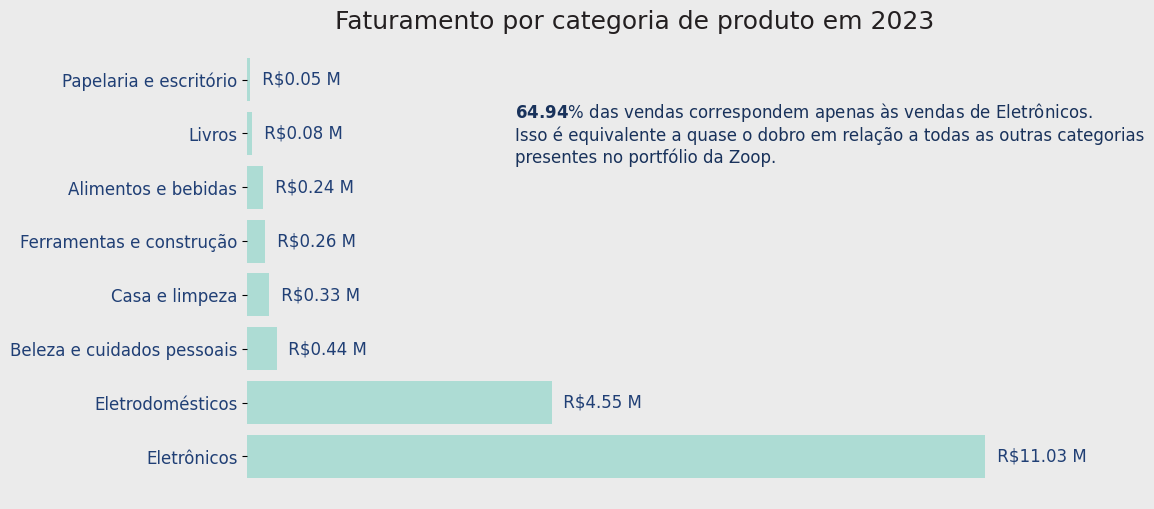

In [120]:
faturamento_por_categoria()

<font color="7b71ff" size=4> Comentários: </font>

---

Fizemos com um único prompt a inserção dos rótulos, alteração das cores e adicionamos um texto explicativo. Com a sequência de explicações para o ChatGPT ele nota alguns padrões na construção e cria parte dos códigos mesmo sem mais detalhes.

## **5.2 - Ajustando os visuais de composição**

---




Já chegamos a praticamente metade dos gráficos refinados. Agora, vamos neste tópico ajustar mais 2 aplicando as técnicas de storytelling que aprendemos aqui no curso por meio da utilização da IA.

### **Gráfico 4 - Vendas por trimestre e método de pagamento:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que você tenha o DataFrame "df" carregado

# Converter a coluna 'data' para o formato datetime, se ainda não estiver
df['data'] = pd.to_datetime(df['data'])

# Criar uma nova coluna para identificar o trimestre
df['trimestre'] = df['data'].dt.to_period('Q')

# Agrupar por trimestre e método de pagamento, somando o faturamento
vendas_por_trimestre = df.groupby(['trimestre', 'metodo_pagamento'])['faturamento'].sum().unstack()

# Visualização em gráfico de barras empilhadas
vendas_por_trimestre.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Vendas por Trimestre e Método de Pagamento')
plt.xlabel('Trimestre')
plt.ylabel('Vendas')
plt.legend(title='Método de Pagamento')

plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Vamos agora para o gráfico de Vendas por Trimestre e Método de Pagamento que produzimos anteriormente. Vamos refiná-lo usando as seguintes orientações.

O nosso gráfico precisa seguir a identidade visual da Zoop, com o fundo da figura e do plot na cor CINZA_1 e o tamanho da figura deve ser de (10, 6). A sequência de cores das colunas empilhadas (palette) é [BRANCO, CINZA_3, AQUA_1, AQUA_3].

O título da figura é "Vendas por Trimestre e Método de Pagamento em 2023" com tamanho 18 e sua cor CINZA_5.

Os rótulos do eixo x (xticks) precisam estar em 0 graus e ter tamanho 12 com a cor AZUL_1. Os rótulos do eixo y (yticks) devem
estar no formato f"R$ valor M" sem casas decimais e os labels do eixo x e y (xlabel e ylabel) devem ser suprimidos. Todas as bordas do gráfico devem ser suprimidas(['top','bottom','left','right]).

Adicione também um grid tracejado em y

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

In [124]:
def vendas_tri_metodo():

  vendas_por_trimestre = df.groupby(['trimestre', 'metodo_pagamento'])['faturamento'].sum().unstack()

  plt.figure(figsize=(10, 6), facecolor=CINZA_1)
  ax = plt.axes()
  ax.set_facecolor(CINZA_1)

  vendas_por_trimestre.plot(kind='bar', stacked=True, color=[BRANCO, CINZA_3, AQUA_1, AQUA_3], ax=ax, edgecolor=CINZA_1)

  plt.title('Vendas por Trimestre e Método de Pagamento em 2023', fontsize=18, color=CINZA_5)
  plt.xlabel('')
  plt.ylabel('')
  plt.xticks(rotation=0, fontsize=12, color=AZUL_1)
  plt.yticks(ax.get_yticks(), ['R$ {:.0f} M'.format(val / 1e6) for val in ax.get_yticks()], fontsize=12, color=AZUL_1)
  ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
  ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)
  ax.set_axisbelow(True)

  return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

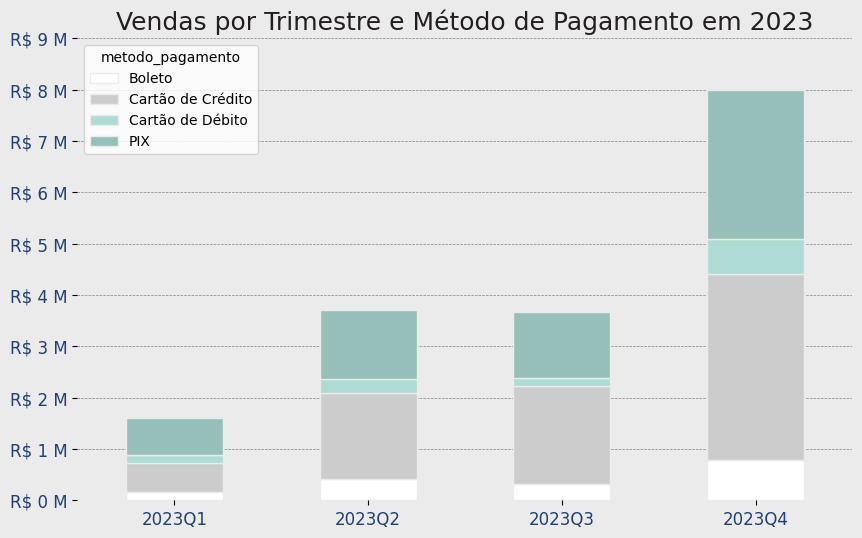

In [125]:
vendas_tri_metodo()

<font color="7b71ff" size=4> Comentários: </font>

---

Ajustamos o gráfico de barras empilhadas representando com cores mais brandas os valores dos métodos de pagamento. Podemos notar coisas interessantes nesse gráfico, como: 2º e 4º tri como sendo os momentos em que a Zoop fatura mais com vendas e, também, o aumento do pagamento das compras feitas pelos clientes por meio do cartão de crédito.

### **Gráfico 5 - Clientes participantes do programa de cashback:**

Agora chegou a hora do gráfico de setores. Ele já esta bem encaminhado, mas precisamos realizar alguns ajustes.

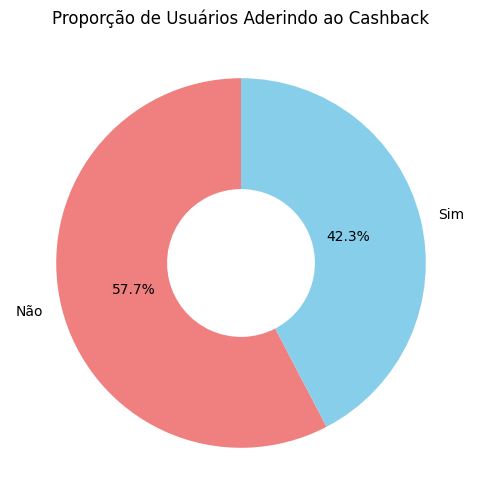

In [126]:
import matplotlib.pyplot as plt

# Calcular a proporção de adesão ao cashback
proporcao_cashback = df['cashback'].value_counts(normalize=True)

# Cores invertidas
cores_invertidas = ['lightcoral', 'skyblue']

# Visualização em gráfico de rosca (donut)
plt.figure(figsize=(6, 6))
plt.pie(proporcao_cashback, labels=proporcao_cashback.index, autopct='%1.1f%%', startangle=90, colors=cores_invertidas, wedgeprops=dict(width=0.6))
plt.title('Proporção de Usuários Aderindo ao Cashback')
plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Agora, vamos refinar o gráfico de rosca que produzimos para a proporção de usuários aderindo ao programa de cashback.

O nosso gráfico precisa seguir a identidade visual da Zoop, com o fundo da figura e do plot na cor CINZA_1, a cor da fatia de valor "Não" igual a CINZA_3, a cor da fatia de valor "Sim" igual a AZUL_1  e o tamanho da figura deve ser de (6, 6).

O título da figura é "Participam do programa de cashback?" com tamanho 18 e sua cor CINZA_5.

Os rótulos das fatias precisam ter a mesma cor das fatias e tamanho 12 e as porcentagens precisam estar na cor BRANCO, também com tamanho 12.

A propriedade da largura da rosca (`wedgeprops`) precisa ser de 0.4, a posição das porcentagens dentro da fatia (`pctdistance`) precisa ser de 0.8, o ângulo de início de 180 (`startangle`) e sem explosão de fatias.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

<font color="7b71ff" size=4> Comentários: </font>

---

Alteramos mais um gráfico, agora o de rosca, para representar a proporção dos(a) nossos(as) clientes. Demos maior destaque ao "Sim", utilizando a cor como recurso de ponto focal.

## **5.3 - Ajustando os visuais de distribuição**

---



Agora vamos para os últimos 2 gráficos antes da exportação dos visuais. Vamos aplicar mais técnicas de storytelling que aprendemos por meio da utilização da IA.



### **Gráfico 6 - Avaliações dos produtos:**

Agora vamos para a distribuição das avaliações dos produtos em que criamos um histograma. Vamos adicionar mais um novo elemento visual e realizar alguns ajustes.

In [ ]:
import matplotlib.pyplot as plt

# Supondo que você tenha o DataFrame "df" carregado

# Visualização em histograma
plt.figure(figsize=(10, 6))
plt.hist(df['avaliacao_compra'], bins=11, edgecolor='black', color='skyblue')
plt.title('Distribuição das Avaliações de Compra')
plt.xlabel('Avaliação')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Vamos agora para o gráfico da Distribuição das Avaliações de Compra que produzimos anteriormente. Vamos refiná-lo usando as seguintes orientações.

O nosso gráfico precisa seguir a identidade visual da Zoop, com o fundo da figura e do plot na cor CINZA_1, a cor das colunas VERMELHO_1 e o tamanho da figura deve ser de (10, 6).

O título da figura é "Distribuição das avaliações das compras em 2023" com tamanho 18 e sua cor CINZA_5.

Os rótulos do eixo x (xticks) precisa estar no range de 0 a 10 com bins de 11 bins e ter tamanho 12 com a cor AZUL_1. Os rótulos do eixo y (yticks) devem ter tamanho 12 com a cor AZUL_1 e os labels do eixo x e y (xlabel e ylabel) também devem ter tamanho 12 com a cor AZUL_1. Todas as bordas do gráfico devem ser suprimidas(['top','bottom','left','right]).

O grid do y tem que estar atrás do gráfico (`ax.set_axisbelow(True)`).

Vamos adicionar uma caixa de anotação (`ax.annotate()`) com o fundo na cor BRANCO e a borda na cor CINZA_3 dentro da área do plot. O texto da anotação é

```
f"Média de avaliações = {df['avaliacao_compra'].mean().round(2)}\n
Avaliação mais comum = {df['avaliacao_compra'].value_counts().idxmax()}\n
Frequência da mais comum = {df['avaliacao_compra'].value_counts().max()}"
```

na cor AZUL_1. Adicione a caixa da anotação com o texto na posição xytext=(2, 1800) e coloque uma seta, na cor AZUL_1, saindo da caixa até a posição xy=(9, 2250).


Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

In [127]:
def cashback():
  proporcao_cashback = df['cashback'].value_counts(normalize=True)

  fig, ax= plt.subplots(figsize=(6, 6), facecolor=CINZA_1)
  ax.set_facecolor(CINZA_1)

  wedges, texts, autotexts = ax.pie(proporcao_cashback, labels=proporcao_cashback.index, autopct='%1.1f%%', startangle=180,  wedgeprops=dict(width=0.4, edgecolor=CINZA_1), pctdistance=0.8, colors=[CINZA_3, AZUL_1])

  plt.title('Participam do Programa?', fontsize=18, color=CINZA_5)


  for text, autotex, color in zip(texts, autotexts, [CINZA_3, AZUL_1]):
      text.set_color(color)
      text.set_fontsize(12)
      autotex.set_color(BRANCO)
      autotex.set_fontsize(12)

  return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

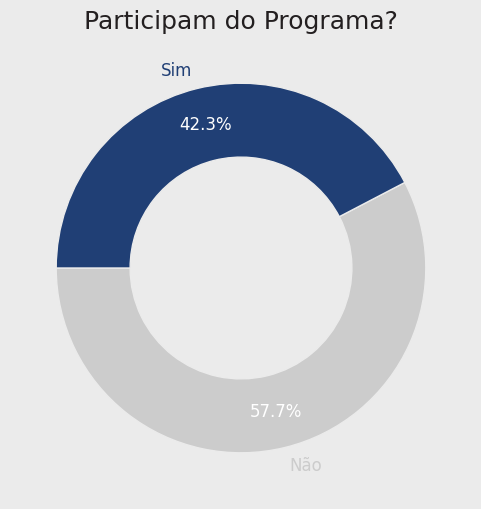

In [128]:
cashback()

<font color="7b71ff" size=4> Comentários: </font>

---

Mais uma novidade aqui em nosso gráfico! Adicionamos o recurso de bloco de anotações que é muito bom para colocar informações a respeito do dado. Com ele é possível utilizar as setas como indicadores para destaque.

### **Gráfico 7 - Distribuição do público por idade e sexo biológico:**

Agora vamos para o nosso último visual!

<ipython-input-129-4120b2efcaee>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sexo_biologico', y='idade', palette='pastel')


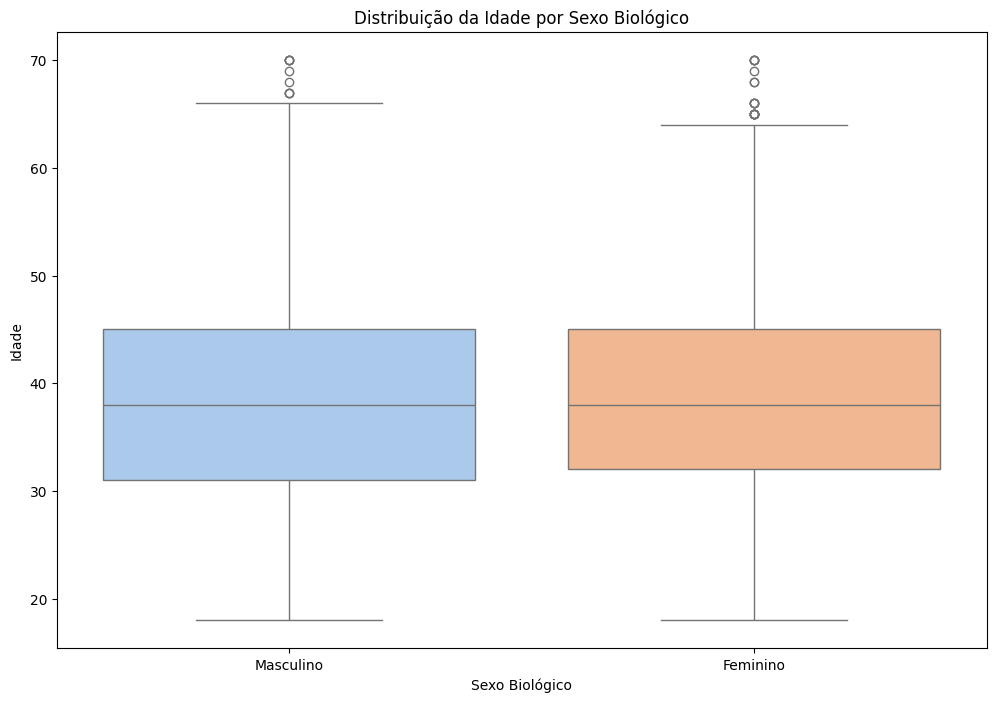

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que você tenha o DataFrame "df" carregado

# Visualização em boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='sexo_biologico', y='idade', palette='pastel')
plt.title('Distribuição da Idade por Sexo Biológico')
plt.xlabel('Sexo Biológico')
plt.ylabel('Idade')

plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Vamos agora para o gráfico de boxplot da Distribuição da Idade por Sexo Biológico que produzimos anteriormente. Vamos refiná-lo usando as seguintes orientações.

O nosso gráfico precisa seguir a identidade visual da Zoop, com o fundo da figura e do plot na cor CINZA_1, e o tamanho da figura deve ser de (10, 6).

O título da figura é "Distribuição da Idade por Sexo Biológico dos(as) clientes" com tamanho 18 e sua cor CINZA_5.

A coluna 'sexo_biologico' é representada no eixo x e a 'idade' no eixo y. A paleta de cores para os valores de x é [AZUL_1, AQUA_1].

O label do eixo x (xlabel) deve ser suprimido. Os rótulos do eixo x e y (xticks e yticks) devem ter tamanho 12 com a cor AZUL_1 e o label do eixo y (ylabel) também deve ter tamanho 12 com a cor AZUL_1. Todas as bordas do gráfico devem ser suprimidas e o grid do eixo y tem que estar atrás do gráfico (`ax.set_axisbelow(True)`).

Vamos adicionar duas caixas de anotação (`ax.annotate()`) com o fundo na cor BRANCO e a borda na cor CINZA_3 dentro da área do plot.

O texto da primeira anotação na cor AZUL_1 é

```
f"Mínimo = df.groupby("sexo_biologico")["idade"].min()[1]\n
1º quartil = df.groupby("sexo_biologico")["idade"].quantile(.25)[1]\n
2º quartil = df.groupby("sexo_biologico")["idade"].median()[1]\n
3º quartil = df.groupby("sexo_biologico")["idade"].quantile(.75)[1]\n
Máximo = df.groupby("sexo_biologico")["idade"].max()[1]"
```

 Adicione a caixa da anotação com o texto na posição xytext=(-0.4, 50) e coloque uma seta, na cor AZUL_1, saindo da caixa até a posição xy=(-0.1, 45).

 O texto da segunda anotação na cor AZUL_1 é

```
f"Mínimo = df.groupby("sexo_biologico")["idade"].min()[0]\n
1º quartil = df.groupby("sexo_biologico")["idade"].quantile(.25)[0]\n
2º quartil = df.groupby("sexo_biologico")["idade"].median()[0]\n
3º quartil = df.groupby("sexo_biologico")["idade"].quantile(.75)[0]\n
Máximo = df.groupby("sexo_biologico")["idade"].max()[0]"
```

 Adicione a caixa da anotação com o texto na posição xytext=(0.6, 50) e coloque uma seta, na cor AZUL_1, saindo da caixa até a posição xy=(0.9, 45).

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

<ipython-input-130-ba6512abe68c>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-130-ba6512abe68c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"Mínimo = {min_idade[1]}\n"
<ipython-input-130-ba6512abe68c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"1º quartil = {q1[1]}\n"
<ipython-input-130-ba6512abe68c>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treate

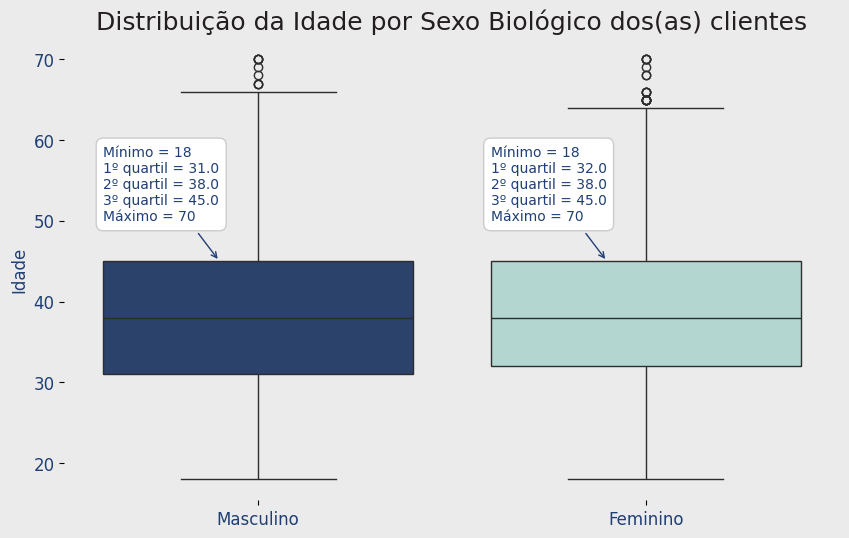

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupamentos necessários
grupo = df.groupby("sexo_biologico")["idade"]
min_idade = grupo.min()
q1 = grupo.quantile(0.25)
mediana = grupo.median()
q3 = grupo.quantile(0.75)
max_idade = grupo.max()

# Criação da figura e eixos
plt.figure(figsize=(10, 6), facecolor=CINZA_1)
ax = plt.axes()
ax.set_facecolor(CINZA_1)
ax.set_axisbelow(True)

# Criação do boxplot
sns.boxplot(
    data=df,
    x='sexo_biologico',
    y='idade',
    palette=[AZUL_1, AQUA_1],
    ax=ax
)

# Título e eixos
plt.title("Distribuição da Idade por Sexo Biológico dos(as) clientes", fontsize=18, color=CINZA_5)
plt.xlabel('')
plt.ylabel('Idade', fontsize=12, color=AZUL_1)
plt.xticks(fontsize=12, color=AZUL_1)
plt.yticks(fontsize=12, color=AZUL_1)

# Remove as bordas do gráfico
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

# Primeira anotação (sexo_biologico == 1)
texto_1 = (
    f"Mínimo = {min_idade[1]}\n"
    f"1º quartil = {q1[1]}\n"
    f"2º quartil = {mediana[1]}\n"
    f"3º quartil = {q3[1]}\n"
    f"Máximo = {max_idade[1]}"
)
ax.annotate(
    texto_1,
    xy=(-0.1, 45),
    xytext=(-0.4, 50),
    textcoords='data',
    fontsize=10,
    color=AZUL_1,
    bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor=CINZA_3),
    arrowprops=dict(arrowstyle='->', color=AZUL_1)
)

# Segunda anotação (sexo_biologico == 0)
texto_0 = (
    f"Mínimo = {min_idade[0]}\n"
    f"1º quartil = {q1[0]}\n"
    f"2º quartil = {mediana[0]}\n"
    f"3º quartil = {q3[0]}\n"
    f"Máximo = {max_idade[0]}"
)
ax.annotate(
    texto_0,
    xy=(0.9, 45),
    xytext=(0.6, 50),
    textcoords='data',
    fontsize=10,
    color=AZUL_1,
    bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor=CINZA_3),
    arrowprops=dict(arrowstyle='->', color=AZUL_1)
)

plt.show()


<font color="7b71ff" size=4> Comentários: </font>

---

Para nosso último gráfico, criamos novamente o bloco de anotações apontando para os valores que são exibidos em um boxplot. Notamos que a distribuição entre o clientes do sexo biológico masculino e feminino está bem próxima com apenas um ano a mais no intervalo interquartil (1º a 3º) no caso do sexo biológico masculino. A Zoop tem na mediana a clientela dentro dos 38 anos de idade para ambos sexos.

## **5.4 - Exportando os visuais**

---



Pronto! Agora que finalizamos os ajustes de todos os gráficos requisitados, vamos gerar um último código para exportar cada um dos gráficos que transformamos em funções no formato de imagem (PNG).



> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Agora, vamos para a nossa ultima etapa: salvar as visualizações como imagem. Coloquei cada um dos gráficos que geramos dentro de uma função e quero que seja aplicada a cada uma delas o seguinte procedimento:

```
nome_imagem = nome_funcao()
nome_imagem.savefig('nome_imagem.png', bbox_inches='tight')
nome_imagem.close()
```

As funções são:

*   metodos_pag()
*   vendas_mensais()
*   faturamento_por_categoria()
*   vendas_tri_metodo()
*   cashback()
*   avaliacao_compra()
*   dist_idade_sexo()

Troque a variável `nome_imagem` por `grafico_` seguido do nome da função que gera o gráfico.

Utilize a linguagem Python para criar o código e não exiba as imagens.

In [134]:
def salvar_grafico(grafico,nome):
  imagem = grafico()
  imagem.savefig(f'{nome}.png', bbox_inches='tight')
  imagem.close()

salvar_grafico(metodos_pag,'metodos_pag')
salvar_grafico(vendas_mensais,'vendas_mensais')
salvar_grafico(faturamento_por_categoria,'faturamento_por_categoria')
salvar_grafico(vendas_tri_metodo,'vendas_tri_metodo')
salvar_grafico(cashback,'cashback')


<ipython-input-108-4adaf21443a3>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentual = (metodos_de_pagamento[0] + metodos_de_pagamento[1]) / total_clientes * 100


Agora é a sua vez! Que tal baixar os gráficos e gerar um relatório trazendo alguns insights e explicando os resultados?

Espero que tenha curtido este curso e faça bom proveito do conteúdo!